# PREDICTION OF CREDIT CARD FRAUD

### Problem statement:-

The objective of this project is to develop machine learning models capable of accurately predicting fraudulent credit card transactions. This task is of paramount importance for both banks and customers. For banks, preventing fraudulent activities is crucial as each fraudulent transaction represents a financial loss that the bank must absorb. Moreover, ensuring the security of customers' funds is essential for maintaining trust and satisfaction.

The dataset used in this project encompasses transactions made by European credit cardholders over a two-day period in September 2013. A significant challenge posed by this dataset is its high imbalance: fraudulent transactions constitute only 0.172% of the total transactions. Addressing this data imbalance is critical to building effective models. Various algorithms will be employed and evaluated to determine the best model for accurately identifying fraudulent transactions. The ultimate goal is to develop a robust fraud detection system that minimizes false positives and false negatives, thereby protecting the financial interests of both banks and their customers.

## Steps:-
The steps are broadly divided into below steps. The sub steps are also listed while we approach each of the steps.
1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

### STEPS
Here's a more detailed version of the steps involved in a credit card fraud detection project, including sub-steps:

---

## Steps:
The process is broadly divided into the following steps, each with its own sub-steps to ensure a thorough approach:

### 1. Reading, Understanding, and Visualizing the Data
   - **Data Collection**: Gather the dataset of credit card transactions.
   - **Data Exploration**: Analyze the dataset to understand its structure and characteristics.
   - **Descriptive Statistics**: Calculate summary statistics to gain insights into the data.
   - **Data Visualization**: Use plots and graphs to visualize transaction patterns and identify anomalies.

### 2. Preparing the Data for Modelling
   - **Data Cleaning**: Handle missing values, remove duplicates, and correct errors.
   - **Feature Engineering**: Create new features that might help in fraud detection (e.g., transaction time features).
   - **Encoding Categorical Variables**: Convert categorical data into numerical format using techniques like one-hot encoding.
   - **Scaling and Normalization**: Normalize numerical features to ensure they are on a similar scale.
   - **Addressing Class Imbalance**: Use techniques like oversampling, undersampling, or synthetic data generation to balance the dataset.

### 3. Building the Model
   - **Data Splitting**: Split the data into training and testing sets.
   - **Model Selection**: Choose a variety of algorithms to experiment with, such as Logistic Regression, Decision Trees, Random Forest, Gradient Boosting Machines, Support Vector Machines, and Neural Networks.
   - **Baseline Model**: Develop a simple model to establish a performance benchmark.
   - **Model Training**: Train the selected models on the training data.
   - **Hyperparameter Tuning**: Optimize model parameters using techniques like Grid Search 

### 4. Evaluating the Model
   - **Performance Metrics**: Evaluate models using metrics like accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix.
   - **Cross-Validation**: Use k-fold cross-validation to ensure robust model evaluation.
   - **Model Comparison**: Compare the performance of different models to select the best one.

### 5. Model Interpretation and Validation
   - **Feature Importance**: Identify key features contributing to fraud detection.
   - **Model Explainability**: Use techniques like SHAP values to explain model predictions.
   - **Validation**: Validate the selected model on the test set to ensure its generalizability.

### 6. Implementation and Deployment
   - **Pipeline Development**: Create a pipeline that integrates data preprocessing, model training, and prediction.
   - **Real-Time Detection**: Deploy the model to monitor and detect fraudulent transactions in real-time.
   - **Monitoring**: Continuously monitor the model's performance and update it as needed.

### 7. Post-Deployment
   - **Feedback Loop**: Incorporate user feedback and system logs to refine the model.
   - **Model Maintenance**: Regularly retrain the model with new data to maintain its accuracy and effectiveness.
   - **Ethical Considerations**: Ensure the model operates fairly and does not discriminate against any group.

### 8. Documentation and Reporting
   - **Documentation**: Document each step of the process, including data preprocessing, model selection, evaluation metrics, and final results.
   - **Reporting**: Prepare comprehensive reports for stakeholders, summarizing the project's findings and the model's performance.

---

This detailed approach ensures a systematic and thorough development of a credit card fraud detection model, covering all critical aspects from data understanding to deployment and maintenance.

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 500)

# Importing the Dataset

In [4]:
df = pd.read_csv('creditcard.csv')
#Reading First 5Rows
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

# Exploratory data analysis


1.  Understand the Data Structure
2.  Data Cleaning
3.  Descriptive Statistics
4.  Data Visualization
5.  Feature Engineering


## Reading and understanding the data


##### It will use to see first 5Rows from Dataset

In [5]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

##### It will use to last 5Rows from Dataset

In [6]:
df.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
284802 -2.606837 -4.918215  7.305334  1.914428  4.356170 -1.593105  2.711941   
284803  1.058415  0.024330  0.294869  0.584800 -0.975926 -0.150189  0.915802   
284804  3.031260 -0.296827  0.708417  0.432454 -0.484782  0.411614  0.063119   
284805  0.623708 -0.686180  0.679145  0.392087 -0.399126 -1.933849 -0.962886   
284806 -0.649617  1.577006 -0.414650  0.486180 -0.915427 -1.040458 -0.031513   

             V13       V14       V15       V16       V17       V18       V19  \
284802 -0.689256  4.626942 -0.924459  1.107641  1.991691  0.510632 -0.682920   
284803  1.214756 -0.675143  1.164931 -0.711757 -0.025693 -1.221179 -1.545556   
284804 -0.183699 -0.510602  1.329284  0.140716  0.313502  0.395652 -0.577252   
284805 -1.042082  0.449624  1.962563 -0.608577  0.509928  1.113981  2.897849   
284806 -0.188093 -0.084316  0.041333 -0.302620 -0.660377  0.167430 -0.256117   

             V20       V21       V22       V23       V24       V25       V26  \
284802  1.475829  0.213454  0.111864  1.014480 -0.509348  1.436807  0.250034   
284803  0.059616  0.214205  0.924384  0.012463 -1.016226 -0.606624 -0.395255   
284804  0.001396  0.232045  0.578229 -0.037501  0.640134  0.265745 -0.087371   
284805  0.127434  0.265245  0.800049 -0.163298  0.123205 -0.569159  0.546668   
284806  0.382948  0.261057  0.643078  0.376777  0.008797 -0.473649 -0.818267   

             V27       V28  Amount  Class  
284802  0.943651  0.823731    0.77      0  
284803  0.068472 -0.053527   24.79      0  
284804  0.004455 -0.026561   67.88      0  
284805  0.108821  0.104533   10.00      0  
284806 -0.002415  0.013649  217.00      0

##### showing the number of rows and columns. It helps in understanding the size of the dataset

In [7]:
df.shape

(284807, 31)

###### The len() function is used to get the number of items in an object, such as a list, string, or DataFrame. Quickly Checking Dataset Size: Quickly find out how many rows are in the DataFrame.

In [8]:
len(df)

284807

###### columns function is used to Quickly see the names of all columns in the DataFrame.

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

###### This is the simple ways of finding out all the objects columns 


In [10]:
objectList=df.select_dtypes(include=['object']).columns.tolist()
print(objectList)

[]


##### The df.info() method in pandas provides a concise summary of a DataFrame. It is useful for quickly understanding the structure and content of the DataFrame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### df.dtypes attribute provides the data types of each column in a DataFrame.

In [12]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

##### The df.describe().T method in pandas provides a summary of statistics for the numeric columns in a DataFrame, with .T used to transpose the output for better readability.

In [13]:
df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.759061e-12      1.958696  -56.407510     -0.920373   
V2      284807.0 -8.251130e-13      1.651309  -72.715728     -0.598550   
V3      284807.0 -9.654937e-13      1.516255  -48.325589     -0.890365   
V4      284807.0  8.321385e-13      1.415869   -5.683171     -0.848640   
V5      284807.0  1.649999e-13      1.380247 -113.743307     -0.691597   
V6      284807.0  4.248366e-13      1.332271  -26.160506     -0.768296   
V7      284807.0 -3.054600e-13      1.237094  -43.557242     -0.554076   
V8      284807.0  8.777971e-14      1.194353  -73.216718     -0.208630   
V9      284807.0 -1.179749e-12      1.098632  -13.434066     -0.643098   
V10     284807.0  7.092545e-13      1.088850  -24.588262     -0.535426   
V11     284807.0  1.874948e-12      1.020713   -4.797473     -0.762494   
V12     284807.0  1.053347e-12      0.999201  -18.683715     -0.405571   
V13     284807.0  7.127611e-13      0.995274   -5.791881     -0.648539   
V14     284807.0 -1.474791e-13      0.958596  -19.214325     -0.425574   
V15     284807.0 -5.231558e-13      0.915316   -4.498945     -0.582884   
V16     284807.0 -2.282250e-13      0.876253  -14.129855     -0.468037   
V17     284807.0 -6.425436e-13      0.849337  -25.162799     -0.483748   
V18     284807.0  4.950748e-13      0.838176   -9.498746     -0.498850   
V19     284807.0  7.057397e-13      0.814041   -7.213527     -0.456299   
V20     284807.0  1.766111e-12      0.770925  -54.497720     -0.211721   
V21     284807.0 -3.405756e-13      0.734524  -34.830382     -0.228395   
V22     284807.0 -5.723197e-13      0.725702  -10.933144     -0.542350   
V23     284807.0 -9.725856e-13      0.624460  -44.807735     -0.161846   
V24     284807.0  1.464150e-12      0.605647   -2.836627     -0.354586   
V25     284807.0 -6.987102e-13      0.521278  -10.295397     -0.317145   
V26     284807.0 -5.617874e-13      0.482227   -2.604551     -0.326984   
V27     284807.0  3.332082e-12      0.403632  -22.565679     -0.070840   
V28     284807.0 -3.518874e-12      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

# 	Data Cleaning
This might include standardization, handling the missing values and outliers in the data.

1.  handling the missing
2.  outliers treatment
3.  standardization



## Handling missing values


#### Handling missing values in columns. It is used to calculate and display the percentage of missing values in each column of a DataFrame.

In [14]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
Time     0.0
V16      0.0
Amount   0.0
V28      0.0
V27      0.0
V26      0.0
V25      0.0
V24      0.0
V23      0.0
V22      0.0
V21      0.0
V20      0.0
V19      0.0
V18      0.0
V17      0.0
V15      0.0
V1       0.0
V14      0.0
V13      0.0
V12      0.0
V11      0.0
V10      0.0
V9       0.0
V8       0.0
V7       0.0
V6       0.0
V5       0.0
V4       0.0
V3       0.0
V2       0.0
Class    0.0

##### There are no missing values in any of the columns, so the dataset is free of null values. We can Move Forward.


##### The correlation matrix is a crucial tool in data analysis and machine learning for understanding the relationships between numerical variables

In [15]:
# correlation matrix
cor = df.corr()
cor

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  3.777823e-12 -2.118614e-12 -1.733159e-13   
V2     -0.010593  3.777823e-12  1.000000e+00  2.325661e-12 -2.314981e-12   
V3     -0.419618 -2.118614e-12  2.325661e-12  1.000000e+00  2.046235e-13   
V4     -0.105260 -1.733159e-13 -2.314981e-12  2.046235e-13  1.000000e+00   
V5      0.173072 -3.473231e-12 -1.831952e-12 -4.032993e-12 -2.552389e-13   
V6     -0.063016 -1.306165e-13  9.438444e-13 -1.574471e-13  1.084041e-12   
V7      0.084714 -1.116494e-13  5.403436e-12  3.405586e-12  8.135064e-13   
V8     -0.036949  2.114527e-12  2.133785e-14 -1.272385e-12  7.334818e-13   
V9     -0.008660  3.016285e-14  3.238513e-13 -6.812351e-13 -7.143069e-13   
V10     0.030617 -2.615192e-12  1.463282e-12 -1.609126e-12 -1.938143e-12   
V11    -0.247689  1.866551e-12 -8.314960e-13  8.707055e-13  1.874473e-12   
V12     0.124348 -1.238745e-12  6.139448e-13 -2.730043e-12  5.393827e-13   
V13    -0.065902  7.589589e-13 -1.181068e-12 -1.020592e-12  6.813810e-13   
V14    -0.098757 -1.871054e-13 -3.384684e-13 -5.597874e-13 -1.404120e-12   
V15    -0.183453 -3.601390e-13  2.196083e-13  6.442512e-13  1.526382e-12   
V16     0.011903 -1.142884e-12 -8.000510e-13 -8.748795e-13  3.095722e-13   
V17    -0.073297  1.671073e-12  2.028957e-12 -1.058101e-12  1.151414e-14   
V18     0.090438 -5.738830e-13 -1.916566e-14 -8.846578e-13 -1.309615e-12   
V19     0.028975 -2.770259e-12 -2.237098e-13 -1.061131e-12 -9.754131e-13   
V20    -0.050866  2.662926e-13  5.839893e-13  1.873059e-12 -2.347029e-12   
V21     0.044736 -3.276238e-12  2.280202e-12  6.736294e-13 -2.696370e-12   
V22     0.144059  2.281863e-12 -2.548560e-13 -8.909339e-13  4.347776e-13   
V23     0.051142 -2.969746e-12 -4.856120e-12  4.147209e-12 -4.160969e-12   
V24    -0.016182 -1.029876e-12  6.431308e-13  3.407636e-12 -2.368743e-12   
V25    -0.233083  1.144179e-12 -9.423730e-13  5.712956e-13  1.619944e-12   
V26    -0.041407  1.835263e-12 -4.129100e-13 -2.577274e-12 -3.043100e-13   
V27    -0.005135  7.624804e-12 -9.856545e-13 -5.041444e-12 -1.456066e-12   
V28    -0.009413 -9.769215e-13  2.525513e-12  5.189109e-12 -2.832372e-12   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1     -3.473231e-12 -1.306165e-13 -1.116494e-13  2.114527e-12  3.016285e-14   
V2     -1.831952e-12  9.438444e-13  5.403436e-12  2.133785e-14  3.238513e-13   
V3     -4.032993e-12 -1.574471e-13  3.405586e-12 -1.272385e-12 -6.812351e-13   
V4     -2.552389e-13  1.084041e-12  8.135064e-13  7.334818e-13 -7.143069e-13   
V5      1.000000e+00 -6.934789e-14  1.573956e-11 -2.038243e-12 -1.000756e-12   
V6     -6.934789e-14  1.000000e+00 -2.798968e-12 -5.446480e-13  2.036743e-12   
V7      1.573956e-11 -2.798968e-12  1.000000e+00  5.528803e-12  5.088082e-13   
V8     -2.038243e-12 -5.446480e-13  5.528803e-12  1.000000e+00 -2.243172e-12   
V9     -1.000756e-12  2.036743e-12  5.088082e-13 -2.243172e-12  1.000000e+00   
V10    -7.200329e-13  7.429770e-13  1.674650e-12 -1.660630e-12  1.185391e-12   
V11    -5.928181e-13  1.014893e-12 -8.525291e-13  1.296877e-12 -3.970652e-13   
V12     1.812994e-12 -9.265590e-13 -2.826770e-13 -3.860109e-13 -1.904908e-12   
V13    -7.021996e-14  1.484679e-12 -8.171731e-13  7.722897e-13  8.754859e-13   
V14    -1.113015e-13 -1.212766e-12  2.038217e-12 -2.596182e-12 -1.271311e-12   
V15    -1.593594e-12 -1.053548e-12  1.074440e-12  1.648898e-12  8.628709e-13   
V16    -1.619090e-14  1.374197e-12 -1.478776e-12 -1.830899e-12  1.239835e-12   
V17     1.713794e-13  7.431528e-13 -1.231314e-12  7.025405e-13 -1.450585e-12   
V18     1.101433e-12  6.859871e-13 -4.281952e-13  1.499555e

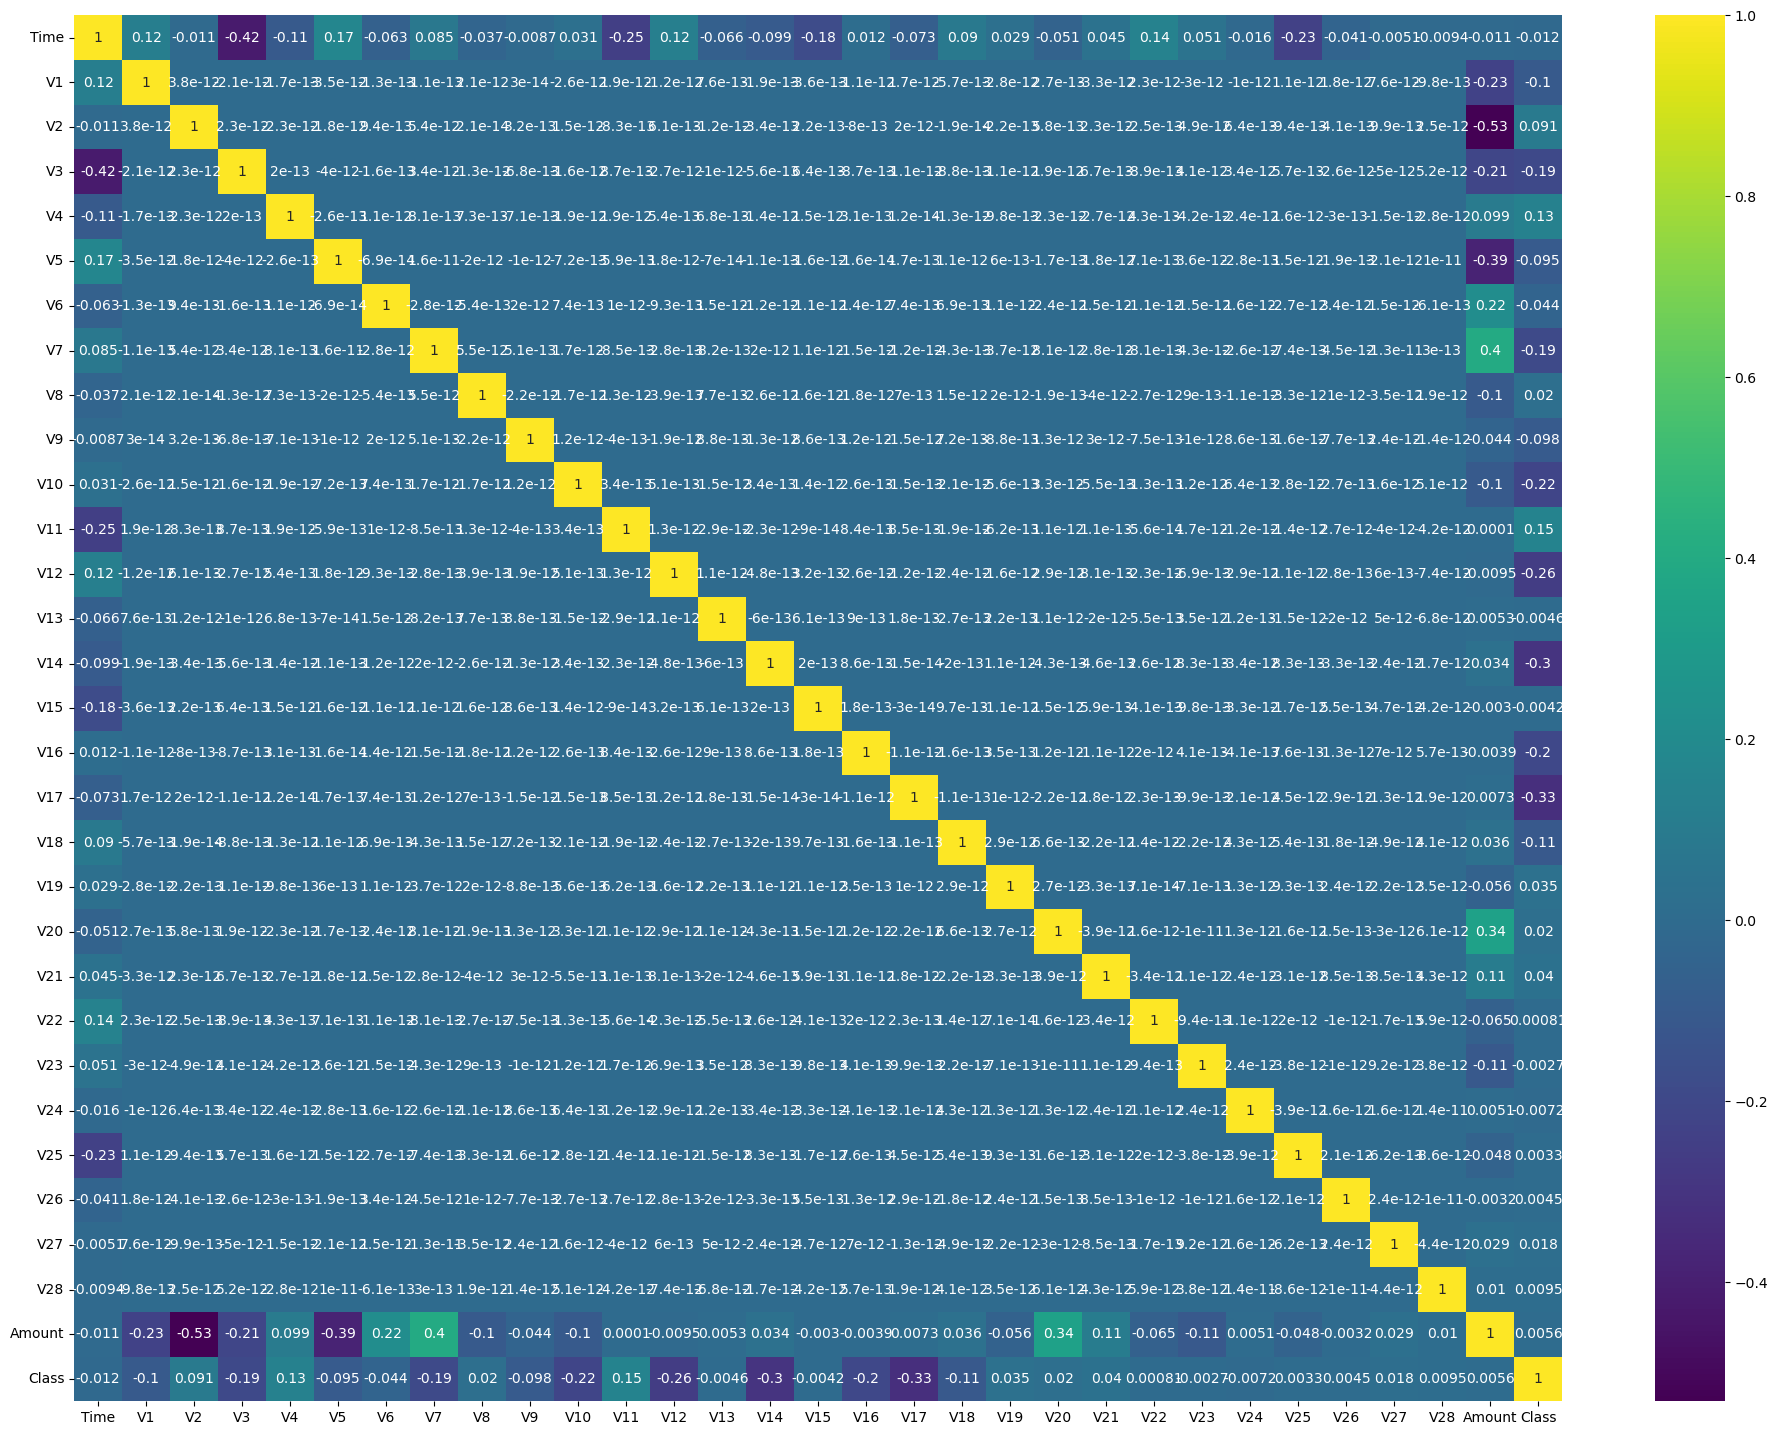

In [16]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="viridis", annot=True)
plt.show()

### Analyzing Class Distribution


##### Checking the distribution of classes in a dataset is essential for several reasons, particularly in classification problems. Here’s why it’s important:

1. Identify Class Imbalance:
Understand Distribution: Determine if the classes are evenly distributed or if some classes are underrepresented or overrepresented.

Impact on Modeling: Class imbalance can lead to biased models that perform well on the majority class but poorly on minority classes.

2. Guide Data Preprocessing:
Resampling Techniques: Decide if techniques like oversampling, undersampling, or synthetic data generation (e.g., SMOTE) are needed to balance the dataset.

Algorithm Choice: Some algorithms handle class imbalance better than others. Knowing the distribution helps in selecting the appropriate algorithm or tuning its parameters.

3. Model Evaluation:
Performance Metrics: Choose appropriate evaluation metrics (e.g., precision, recall, F1-score) based on the class distribution. Accuracy may not be a good metric in imbalanced datasets.

4. Detect Data Issues:
Data Quality: Identify if there are issues with data collection or labeling that result in unexpected class distributions.

In [17]:
classes = df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [18]:
legit_transactions = round((classes[0]/df['Class'].count()*100),2)
legit_transactions

99.83

In [19]:
fraud_transactions = round((classes[1]/df['Class'].count()*100),2)
fraud_transactions

0.17

We can see that there is only 0.17% frauds. We will take care of the class imbalance later.


# Generate a plot for the `Class` column.


#####  Bar plot for the percentage of Legit  vs Fraud transcations

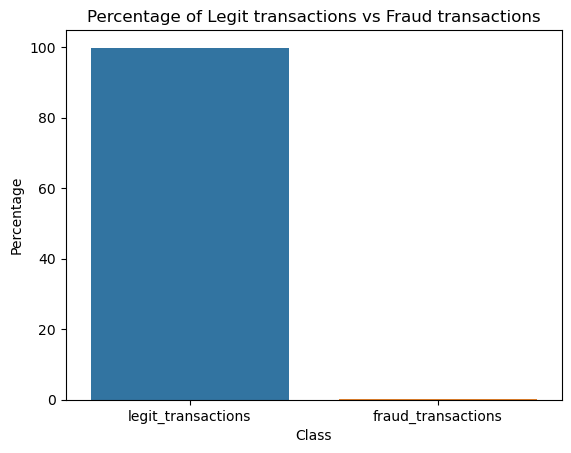

In [20]:
fraud_percentage = {'Class':['legit_transactions', 'fraud_transactions'], 'Percentage':[legit_transactions, fraud_transactions]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of Legit transactions vs Fraud transactions')
plt.savefig('Fraud_Percentage.jpg')

plt.show()

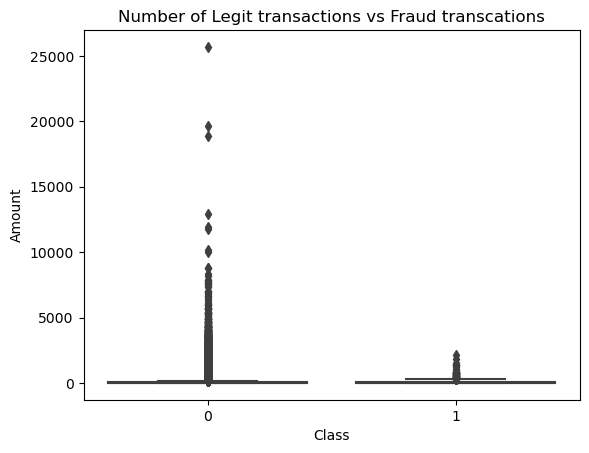

In [21]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Number of Legit transactions vs Fraud transcations')
plt.savefig('Fraud_Percentage(1).jpg')
plt.show()

##### Bar plot for the Number of legit transactions vs Fraud transactions

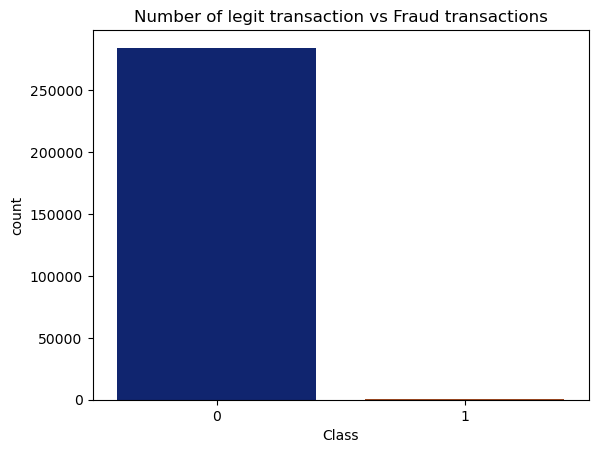

In [22]:
import matplotlib.pyplot as plt

# Reset to default style
plt.style.use('default')


import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df, palette='dark')
plt.title('Number of legit transaction vs Fraud transactions')
plt.savefig('Fraud_Percentage(3).jpg')
plt.show()

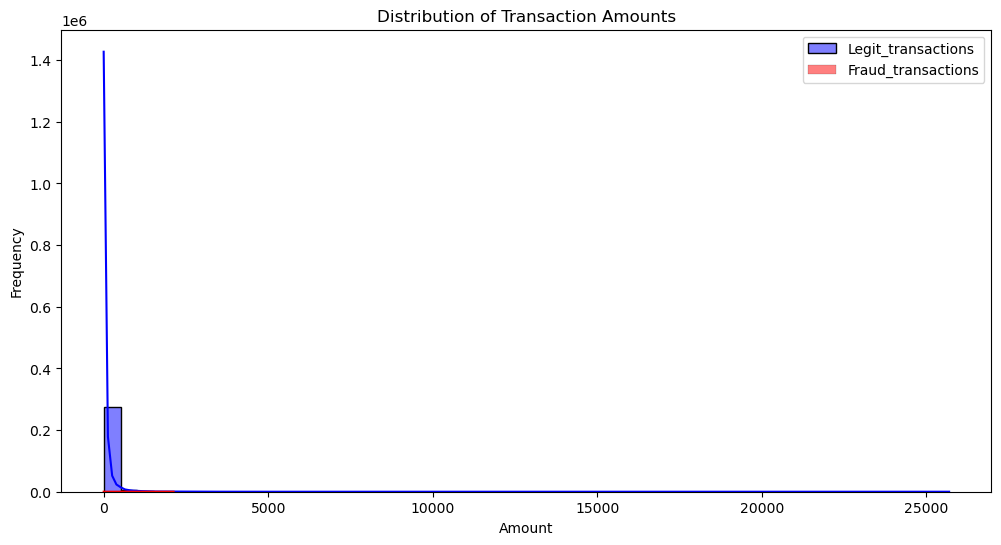

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='blue', label='Legit_transactions', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud_transactions', kde=True)

plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('Fraud_Percentage(4).jpg')
plt.show()

## Outliers treatment


We are not addressing outliers in this dataset, as the columns have already been transformed using PCA, which typically handles outliers during the transformation process.

PCA performs a linear transformation of the data to reduce its dimensionality. This transformation can impact the influence of outliers. In some cases, outliers may be spread out or given less influence on the principal components.

###  **Analyze how class distribution evolves over time**

In [25]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

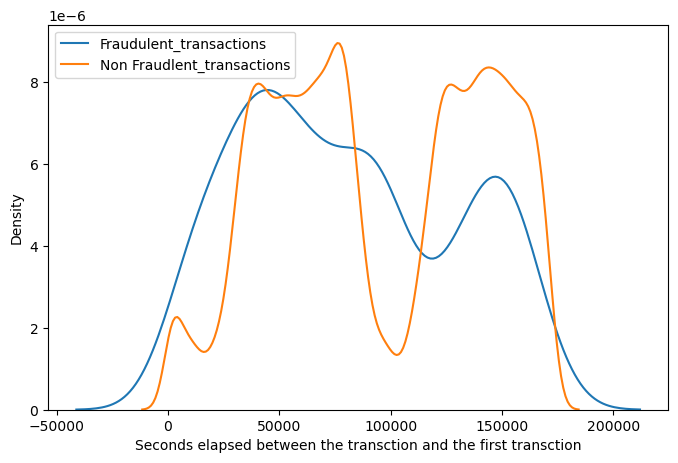

In [26]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='Fraudulent_transactions',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='Non Fraudlent_transactions',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.legend()
plt.savefig('Time_Distributions.jpg')
plt.show()

##### Analysis

No distinct pattern is observed in the distribution of Legit_transactions and fraud transactions over time. Therefore, we recommend removing the 'Time' column from the dataset.

In [27]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### Analyze the distribution of classes based on transaction amounts


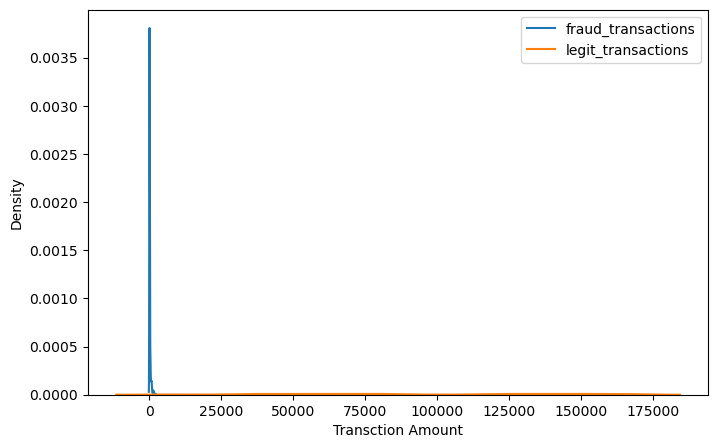

In [28]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraud_transactions',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='legit_transactions',hist=False)
ax.set(xlabel='Transction Amount')
plt.legend()
plt.savefig('Amount_distribution.jpg')
plt.show()

##### Analysis
The analysis reveals that fraudulent transactions are predominantly concentrated in the lower range of amounts, while non-legit transactions are more evenly distributed across both low and high amounts.

## Train-Test Split


In [29]:
# Import library
from sklearn.model_selection import train_test_split

In [30]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  
0  149.62  
1    2.69  
2  378.66  
3  123.50  
4   69.99

In [31]:
# Putting target variable to y
y = df['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

#####  Splitting data into train and test set 80:20

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [33]:
X_train.describe()

V1             V2             V3             V4  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean       -0.000032      -0.003944       0.002865      -0.001922   
std         1.958391       1.659644       1.516709       1.418059   
min       -56.407510     -72.715728     -48.325589      -5.683171   
25%        -0.919695      -0.599757      -0.889695      -0.850598   
50%         0.017829       0.064061       0.182230      -0.022399   
75%         1.315404       0.802870       1.030015       0.741954   
max         2.454930      22.057729       9.382558      16.875344   

                  V5             V6             V7             V8  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean       -0.000947      -0.000061      -0.000016       0.000061   
std         1.385690       1.335895       1.245676       1.191435   
min      -113.743307     -26.160506     -43.557242     -73.216718   
25%        -0.692197      -0.768551      -0.553994      -0.208497   
50%        -0.054942      -0.274254       0.040751       0.022129   
75%         0.610316       0.397676       0.569737       0.326789   
max        34.801666      73.301626     120.589494      19.587773   

                  V9            V10            V11            V12  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean       -0.001593      -0.000694      -0.000611      -0.001531   
std         1.097630       1.087483       1.020886       1.000398   
min       -13.434066     -24.588262      -4.797473     -18.683715   
25%        -0.644644      -0.534816      -0.762283      -0.407787   
50%        -0.052279      -0.092870      -0.033632       0.138591   
75%         0.595635       0.454417       0.738862       0.618446   
max        15.594995      23.745136      11.669205       7.848392   

                 V13            V14            V15            V16  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean        0.000259       0.000519      -0.000348       0.000253   
std         0.995583       0.957651       0.915557       0.877079   
min        -5.791881     -18.822087      -4.391307     -13.563273   
25%        -0.648716      -0.425505      -0.583154      -0.467730   
50%        -0.012348       0.050481       0.047779       0.067116   
75%         0.663506       0.493844       0.648682       0.523600   
max         7.126883      10.526766       8.877742      17.315112   

                 V17            V18            V19            V20  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean       -0.001841       0.000054      -0.000491       0.000315   
std         0.851220       0.838343       0.814438       0.776568   
min       -25.162799      -9.335193      -7.213527     -54.497720   
25%        -0.484477      -0.499210      -0.457115      -0.212236   
50%        -0.066242      -0.003733       0.003217      -0.062646   
75%         0.398173       0.501423       0.458266       0.132928   
max         9.253526       5.041069       5.591971      39.420904   

                 V21            V22            V23            V24  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean       -0.001495      -0.000516      -0.000007       0.000259   
std         0.728161       0.724876       0.627640       0.605752   
min       -34.830382     -10.933144     -44.807735      -2.836627   
25%        -0.228820      -0.542981      -0.161710      -0.354146   
50%        -0.029520       0.006755      -0.011072       0.040956   
75%         0.185726       0.527264       0.147474       0.439693   
max        27.202839      10.503090      22.528412       4.584549   

                 V25            V26            V27            V28  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean       -0.000480      -0.000399      -0.000101      -0.000418   
std         0.520881       0.483458       0.404780       0.329417   
min       

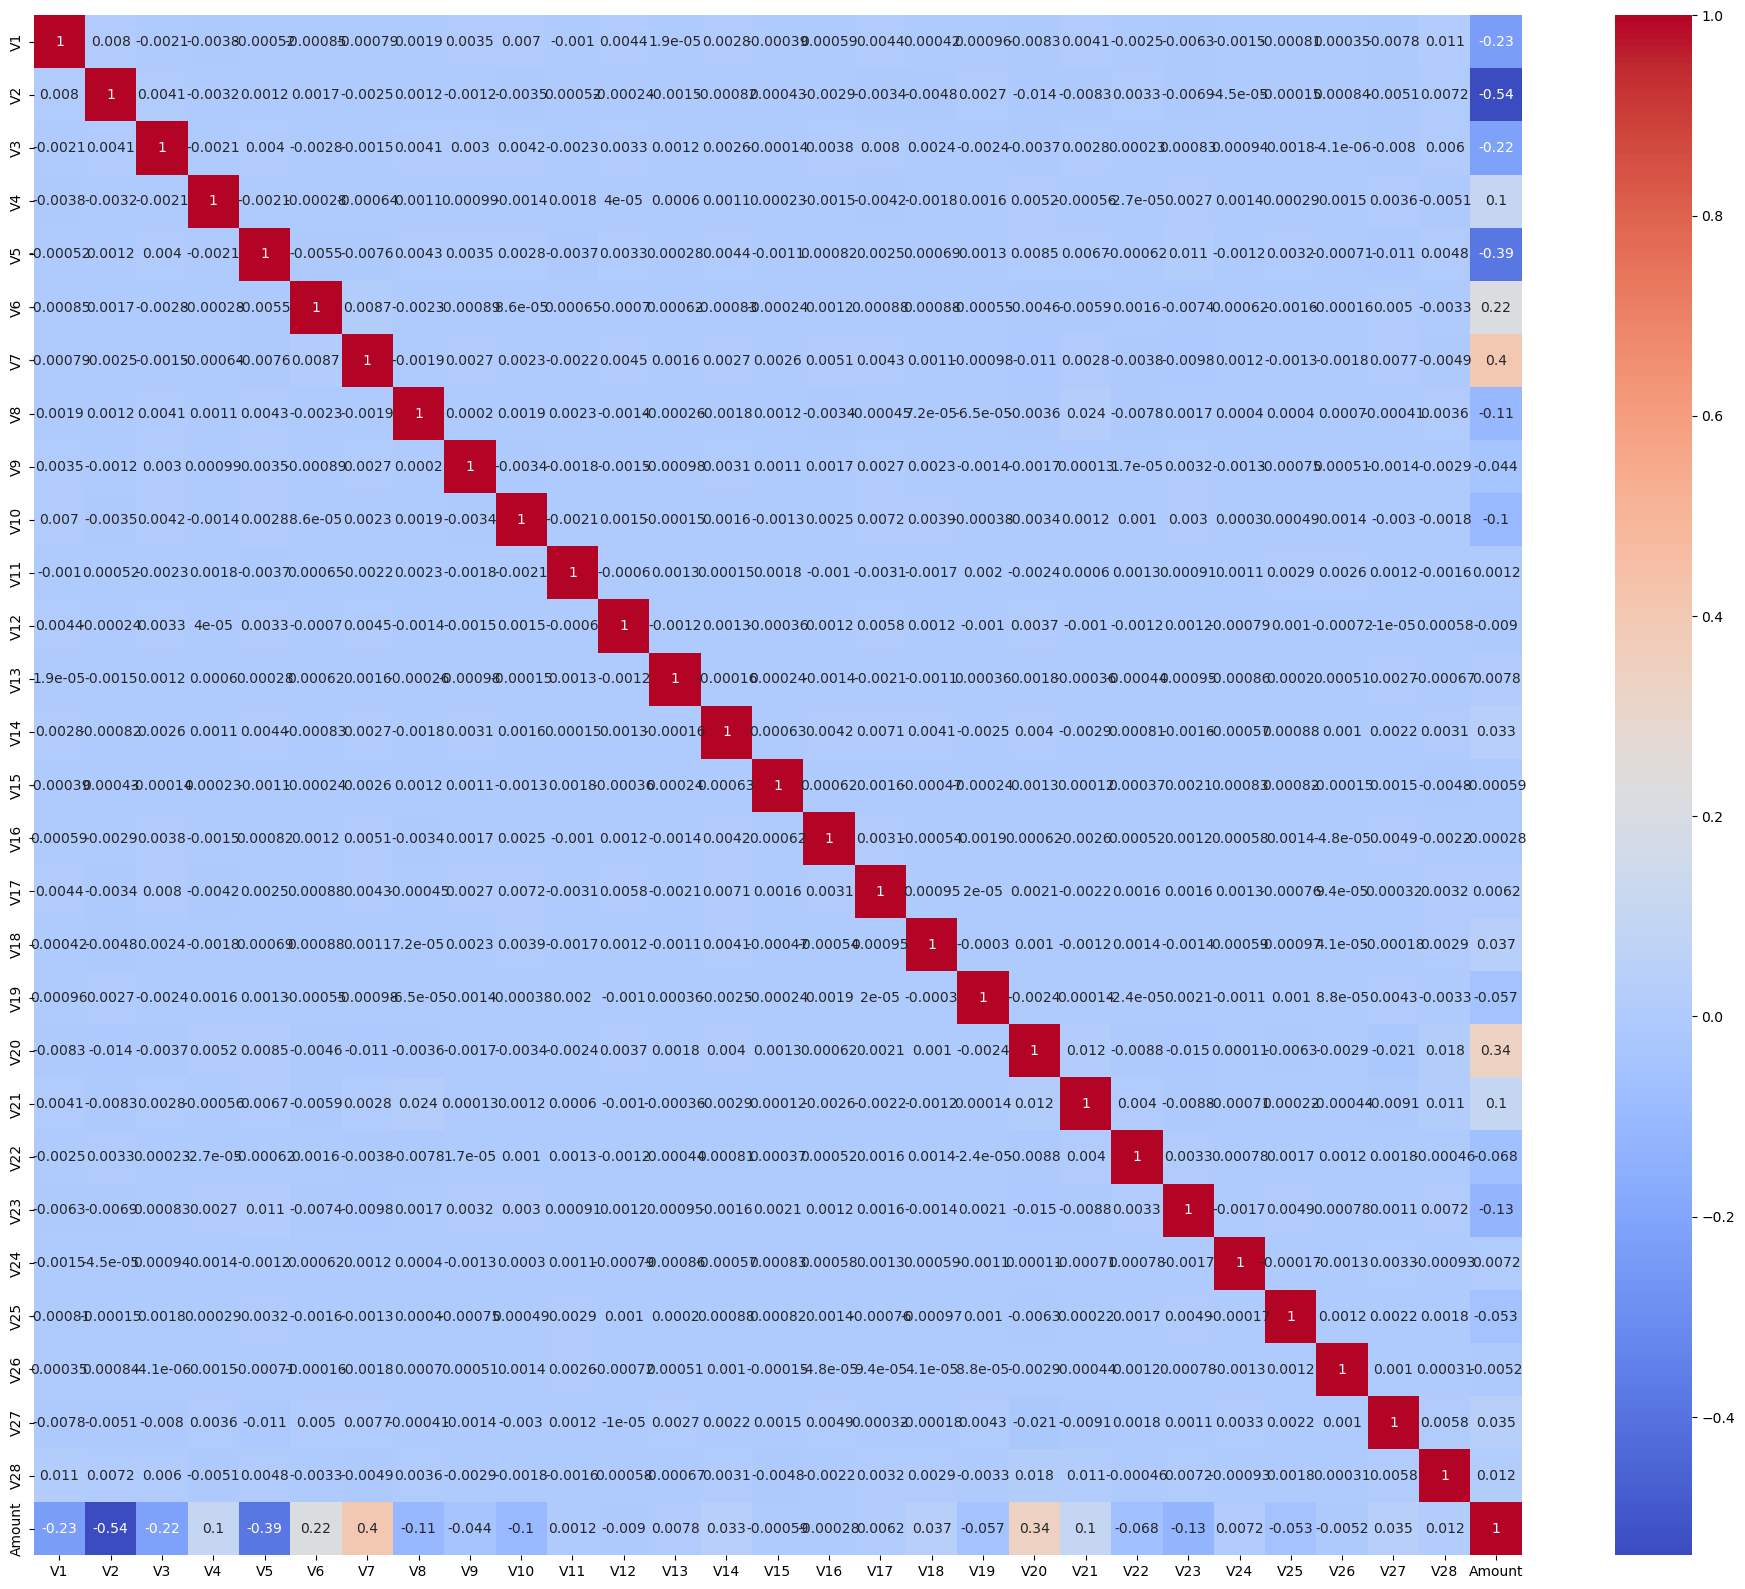

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train is your DataFrame with numeric data
plt.figure(figsize=(24,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')  # Changed colormap here
plt.show()

## Feature Scaling
We need to scale only the `Amount` column as all other columns are already scaled by the PCA transformation.

##### Standardization, or Z-score normalization, is a popular feature scaling method used in machine learning and data preprocessing. It transforms features to have a mean of 0 and a standard deviation of 1.

###### Instantiating a scaler is necessary to prepare it for feature scaling. It allows  to:

**Calculate Parameters:** The scaler computes necessary statistics (like mean and standard deviation for standardization) from the training data.

**Transform Data:** Use the fitted scaler to apply consistent scaling to both training and test datasets, ensuring they are on the same scale.

**Avoid Data Leakage:** Fit the scaler only on training data to prevent data leakage and ensure unbiased evaluation.
In summary, instantiating a scaler ensures that feature scaling is performed correctly and consistently across your datasets.

In [35]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [36]:
# Instantiate the Scaler
scaler = StandardScaler()

In [37]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [38]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  
0  149.62  
1    2.69  
2  378.66  
3  123.50  
4   69.99

##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [39]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
49089   1.229452 -0.235478 -0.627166  0.419877  1.797014  4.069574 -0.896223   
154704  2.016893 -0.088751 -2.989257 -0.142575  2.675427  3.332289 -0.652336   
67247   0.535093 -1.469185  0.868279  0.385462 -1.439135  0.368118 -0.499370   
251657  2.128486 -0.117215 -1.513910  0.166456  0.359070 -0.540072  0.116023   
201903  0.558593  1.587908 -2.368767  5.124413  2.171788 -0.500419  1.059829   

              V8        V9       V10       V11       V12       V13       V14  \
49089   1.036103  0.745991 -0.147304 -0.850459  0.397845 -0.259849 -0.277065   
154704  0.752811  1.962566 -1.025024  1.126976 -2.418093  1.250341 -0.056209   
67247   0.303698  1.042073 -0.437209  1.145725  0.907573 -1.095634 -0.055080   
251657 -0.216140  0.680314  0.079977 -1.705327 -0.127579 -0.207945  0.307878   
201903 -0.254233 -1.959060  0.948915 -0.288169 -1.007647  0.470316 -2.771902   

             V15       V16       V17       V18       V19       V20       V21  \
49089  -0.766810 -0.200946 -0.338122  0.006032  0.477431 -0.057922 -0.170060   
154704 -0.736695  0.014783  1.890249  0.333755 -0.450398 -0.147619 -0.184153   
67247  -0.621880 -0.191066  0.311988 -0.478635  0.231159  0.437685  0.028010   
251657  0.213491  0.163032 -0.587029 -0.561292  0.472667 -0.227278 -0.357993   
201903  0.221958  0.354333  2.603189  1.092576  0.668084  0.249457 -0.035049   

             V22       V23       V24       V25       V26       V27       V28  \
49089  -0.288750 -0.130270  1.025935  0.847990 -0.271476  0.060052  0.018104   
154704 -0.089661  0.087188  0.570679  0.101899  0.620842 -0.048958 -0.042831   
67247  -0.384708 -0.128376  0.286638 -0.136700  0.913904 -0.083364  0.052485   
251657 -0.905085  0.223474 -1.075605 -0.188519  0.267672 -0.071733 -0.072238   
201903  0.271455  0.381606  0.332001 -0.334757  0.448890  0.168585  0.004955   

          Amount  
49089  -0.340485  
154704 -0.320859  
67247   0.853442  
251657 -0.344410  
201903 -0.229480

## Checking the Skewness


In [40]:
# Listing the columns
cols = X.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

######  Plotting the distribution of the variables (skewness) of all the columns

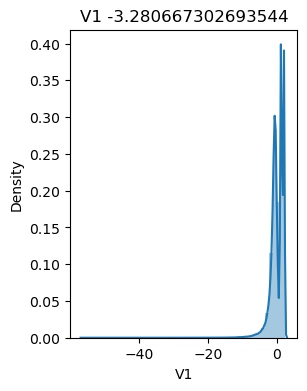

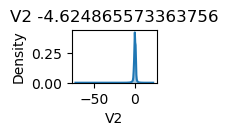

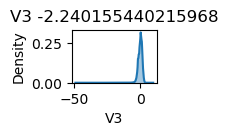

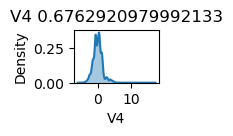

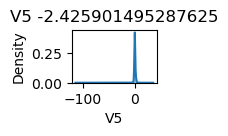

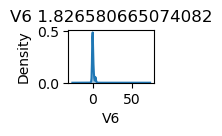

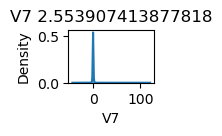

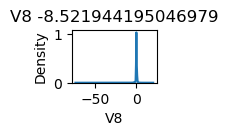

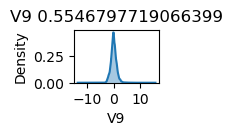

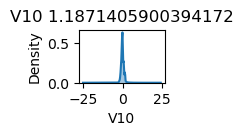

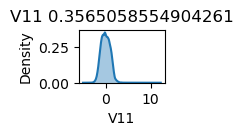

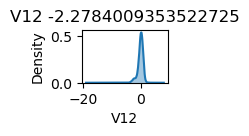

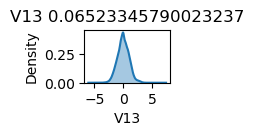

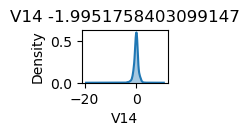

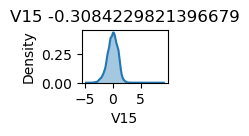

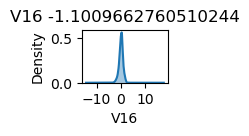

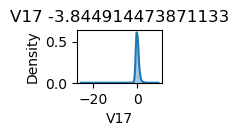

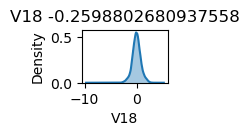

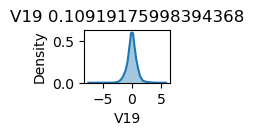

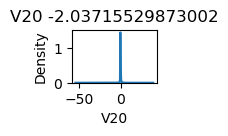

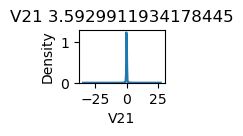

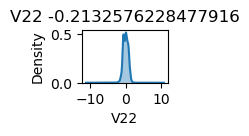

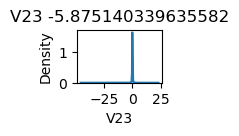

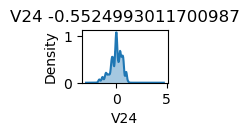

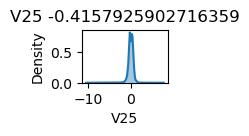

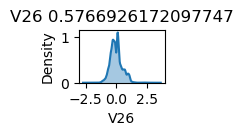

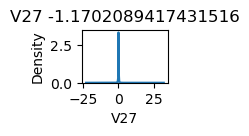

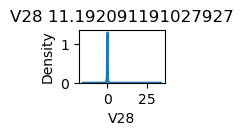

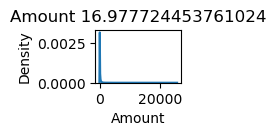

In [41]:
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X[col])
    plt.title(col+' '+str(X[col].skew()))
    # plt.savefig('Distribution_Variable.png')
    plt.savefig('Distribution_Variable.jpg')
    plt.show()

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.


### Reduce Skewness with PowerTransformer


In [42]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

######  Transform the test set

In [43]:
X_test[cols] = pt.transform(X_test)

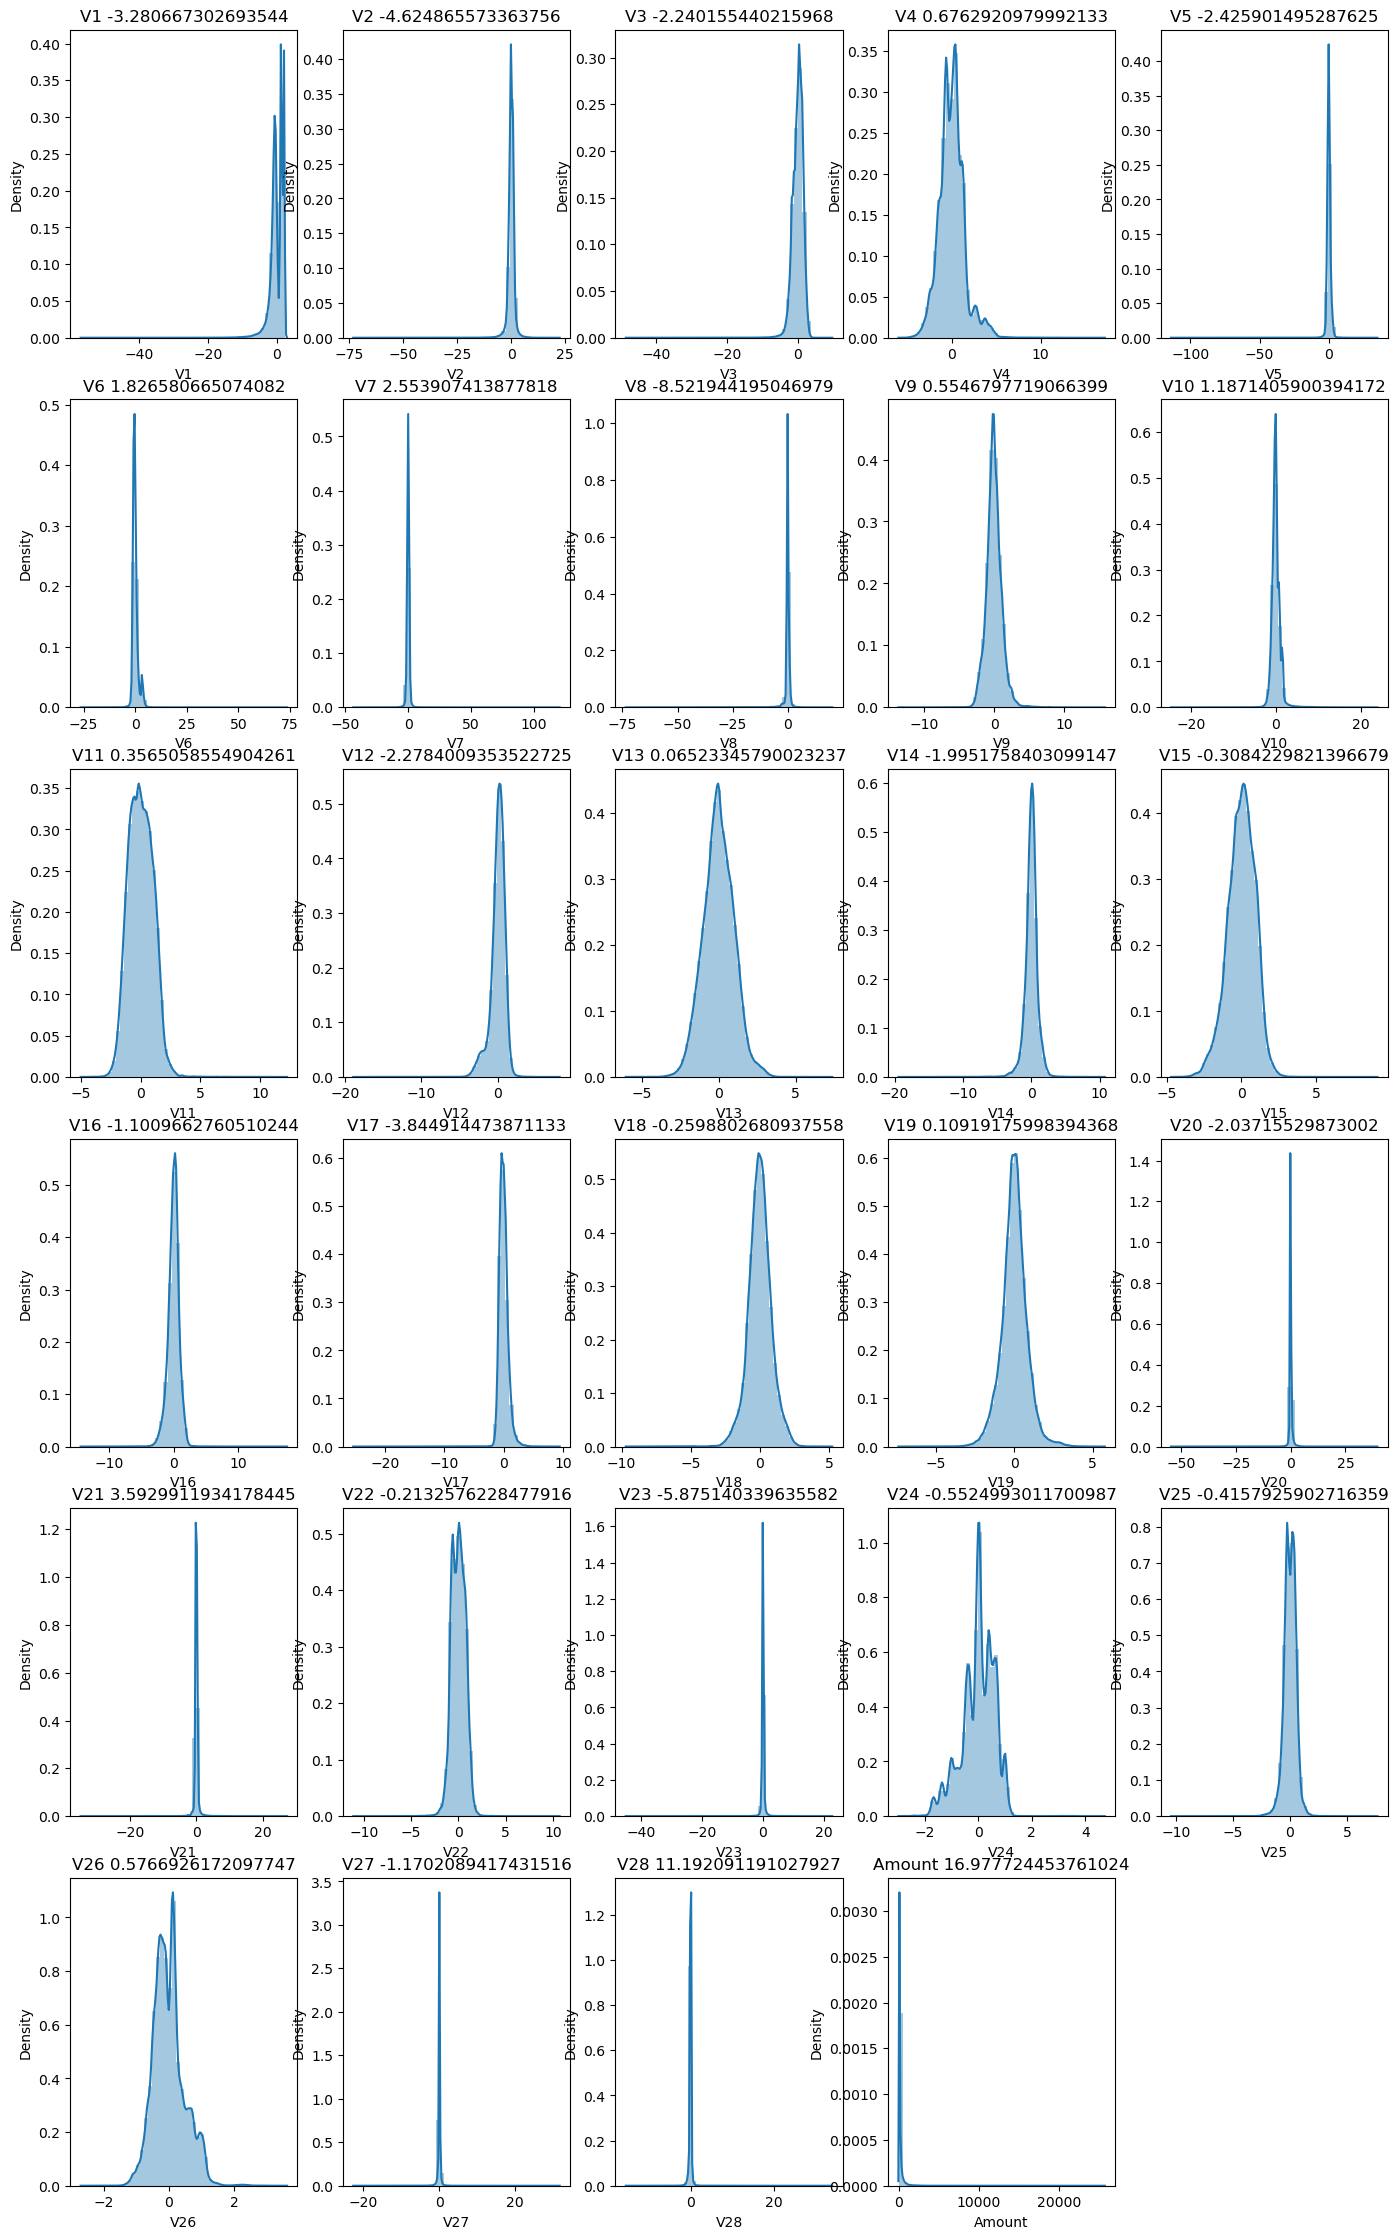

In [44]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X[col])
    plt.title(col+' '+str(X[col].skew()))
    plt.savefig('Distribution_Variable_PowerTransformer.jpg')


In [45]:
desc_stats = X.describe().T[['min', 'mean', 'max']]
desc_stats

min          mean           max
V1      -56.407510  1.759061e-12      2.454930
V2      -72.715728 -8.251130e-13     22.057729
V3      -48.325589 -9.654937e-13      9.382558
V4       -5.683171  8.321385e-13     16.875344
V5     -113.743307  1.649999e-13     34.801666
V6      -26.160506  4.248366e-13     73.301626
V7      -43.557242 -3.054600e-13    120.589494
V8      -73.216718  8.777971e-14     20.007208
V9      -13.434066 -1.179749e-12     15.594995
V10     -24.588262  7.092545e-13     23.745136
V11      -4.797473  1.874948e-12     12.018913
V12     -18.683715  1.053347e-12      7.848392
V13      -5.791881  7.127611e-13      7.126883
V14     -19.214325 -1.474791e-13     10.526766
V15      -4.498945 -5.231558e-13      8.877742
V16     -14.129855 -2.282250e-13     17.315112
V17     -25.162799 -6.425436e-13      9.253526
V18      -9.498746  4.950748e-13      5.041069
V19      -7.213527  7.057397e-13      5.591971
V20     -54.497720  1.766111e-12     39.420904
V21     -34.830382 -3.405756e-13     27.202839
V22     -10.933144 -5.723197e-13     10.503090
V23     -44.807735 -9.725856e-13     22.528412
V24      -2.836627  1.464150e-12      4.584549
V25     -10.295397 -6.987102e-13      7.519589
V26      -2.604551 -5.617874e-13      3.517346
V27     -22.565679  3.332082e-12     31.612198
V28     -15.430084 -3.518874e-12     33.847808
Amount    0.000000  8.834962e+01  25691.160000

Now we can observe that all the variables are normally distributed following the transformation.


# Choosing Metrics for Heavily Imbalanced Data
Given that the dataset is heavily imbalanced, with only 0.17% of transactions being fraudulent, using accuracy as a metric for model evaluation is not appropriate. Accuracy can be misleading in such cases, as a model that predicts the majority class (non-fraudulent) for all data points can still achieve over 99% accuracy. This does not provide a true reflection of the model's performance, especially in identifying the minority class (fraudulent transactions).

To address this, we should consider the ROC-AUC score as a more suitable metric for evaluating the model. The ROC curve helps us understand the model's ability to distinguish between classes by assessing its performance across all possible classification thresholds. The default threshold of 0.5 may not always be the optimal choice for classifying test points, particularly in imbalanced datasets. By analyzing the ROC curve, we can identify the threshold that maximizes the True Positive Rate (TPR) while minimizing the False Positive Rate (FPR), thereby reducing misclassifications.

Once the optimal threshold is determined, we can also compute the F1 score, which balances precision and recall. This score is particularly useful in scenarios where false positives and false negatives have significant consequences, as it provides a more nuanced understanding of the model's performance in classifying the minority class. Additionally, metrics like Precision-Recall AUC and Matthews Correlation Coefficient (MCC) can offer further insights into the model's effectiveness in handling imbalanced data.

### Why Certain Models Were Excluded
**Random Forest:**

Random Forest was excluded from some hyperparameter tuning stages, particularly in cases involving oversampling, due to similar computational challenges. Although Random Forest is generally more scalable than SVM, it still requires substantial computational resources when dealing with a large number of datapoints. The algorithm's ensemble approach involves building multiple decision trees and aggregating their results, which can become resource-intensive and time-consuming, particularly with extensive hyperparameter tuning and large data volumes.

**K-Nearest Neighbors (KNN):**

KNN was not considered due to its inefficiency in handling large datasets. The algorithm stores all data points and calculates distances to every other point for classification or regression, leading to high memory usage and slow performance as the dataset size grows. This inefficiency makes KNN unsuitable for large-scale data analysis where quick and efficient computation is required.

**Gradient Boosting Machines (GBM):**

GBM was also excluded for similar reasons. While powerful, GBM models can be very slow to train, especially with large datasets. The iterative nature of boosting, combined with hyperparameter tuning and the need for numerous trees, results in high computational costs. Training times can become prohibitively long, making it challenging to use in resource-constrained environments.

**Neural Networks:**

Neural Networks, particularly deep learning models, were not utilized due to their significant computational requirements. Training deep networks with large datasets involves extensive matrix operations and high memory usage. The process can be extremely time-consuming and requires specialized hardware (e.g., GPUs) to be feasible, which was not available in this case.

**SVM Computational Challenges:**
**Scalability:**

**Memory Usage:** SVMs require a lot of memory because they need to store the entire dataset in memory while training. As the dataset size increases, the memory requirements can become prohibitive.
Training Time: The training time for SVMs increases significantly with the number of data points and features. This is because SVMs involve solving a quadratic optimization problem, which becomes more complex as the dataset grows.

**Difficulty with Large Datasets:**

**Complexity:** SVMs are generally not as efficient with large datasets, especially when the number of features or data points is very high. This can lead to slow training times and the need for substantial computational resources.

# Techniques for Handling Imbalanced Data in Fraud Detection
Recognizing the heavy imbalance in the data, we will explore multiple techniques to manage it.

**Undersampling:** This technique involves reducing the number of non-fraudulent transactions to match the count of fraudulent transactions (396 in this case). While this balances the class distribution, it may lead to a loss of valuable information from the majority class.

**Oversampling:** In this approach, we increase the number of fraudulent transactions to match the count of non-fraudulent transactions. This helps balance the dataset but may lead to overfitting since the model might memorize the duplicated instances.

**SMOTE (Synthetic Minority Oversampling Technique):** SMOTE generates synthetic data points for the minority class using the nearest neighbor algorithm. By creating new, plausible examples rather than duplicating existing ones, SMOTE helps improve the model's ability to generalize.

**ADASYN (Adaptive Synthetic Sampling):** ADASYN is similar to SMOTE but focuses on generating synthetic data points in regions where the minority class is underrepresented. This adaptive approach prioritizes areas with higher misclassification risk, thereby improving the model's performance in those regions.

**Additionally, we can evaluate the impact of these techniques on the model's performance using metrics like Precision, Recall, F1 Score, and ROC-AUC to ensure a comprehensive understanding of their effectiveness.**

## Undersampling


In [46]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [47]:
# instantiating the random undersampler
rus = RandomUnderSampler()
# resampling X, y
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [48]:
# Before sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_rus))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 396, 1: 396})


## Building Models on Balanced Data Through Undersampling

Model Used

1.   Logistic Regression
2.   XGBoost
3.   Decision tree

### Importing Metrics

In [50]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## Logistic Regression


In [51]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing libraries for cross validation


In [52]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Hyperparameter Tuning(Logistic Regression)

In [54]:
# Creating KFold object with 5 splits
def logictic_hyper_parameter(X,y):
    """
this function is work as a hyperparameter tuning for logistic regression,
it takes the input in form of x and y and return the best hyperparameter
    Args:
      X:
      y:

    Returns:

    """
    folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
    params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
    model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
    return model_cv.fit(X, y)

In [57]:
hyper_parameter=logictic_hyper_parameter(X_rus,y_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [58]:
# results of grid search CV
cv_results = pd.DataFrame(hyper_parameter.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.025324      0.006547         0.020659        0.028779    0.01   
1       0.037335      0.010745         0.004468        0.005597     0.1   
2       0.045252      0.009388         0.003978        0.005914       1   
3       0.063457      0.025275         0.006259        0.007665      10   
4       0.057189      0.009668         0.005676        0.005746     100   
5       0.057281      0.007032         0.007536        0.006859    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.987599           0.992561           0.982051   
1   {'C': 0.1}           0.984102           0.989554           0.985737   
2     {'C': 1}           0.983784           0.988287           0.983013   
3    {'C': 10}           0.975358           0.988287           0.980609   
4   {'C': 100}           0.973291           0.989237           0.979808   
5  {'C': 1000}           0.972814           0.989395           0.979487   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.983325           0.984206         0.985949        0.003783   
1           0.984287           0.985173         0.985771        0.001983   
2           0.978515           0.985173         0.983755        0.003180   
3           0.977393           0.986301         0.981590        0.004989   
4           0.976110           0.986624         0.981014        0.006070   
5           0.975629           0.986624         0.980790        0.006325   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.988716            0.988260   
1                2            0.990673            0.989528   
2                3            0.991552            0.990047   
3                4            0.992670            0.990306   
4                5            0.992720            0.990366   
5                6            0.992700            0.990326   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.989999            0.988824            0.989328   
1            0.991044            0.990297            0.990712   
2            0.990954            0.991322            0.990901   
3            0.991551            0.991710            0.991339   
4            0.991691            0.991660            0.991479   
5            0.991770            0.991720            0.991489   

   mean_train_score  std_train_score  
0          0.989025         0.000594  
1          0.990451         0.000519  
2          0.990955         0.000514  
3          0.991516         0.000757  
4          0.991583         0.000749  
5          0.991601         0.000760

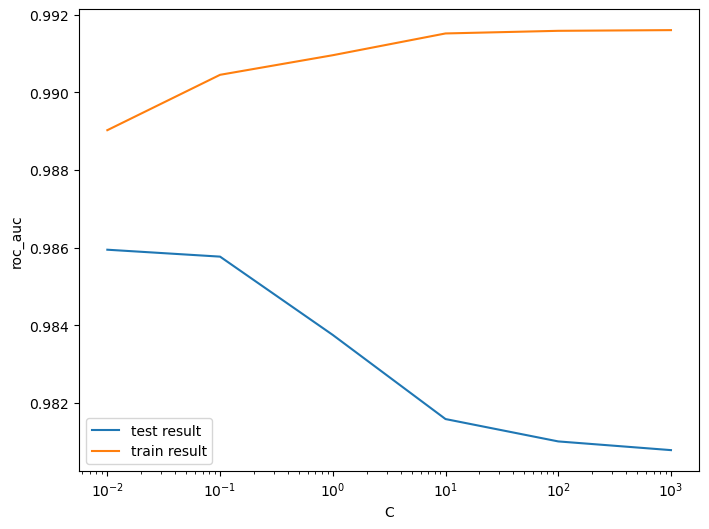

In [59]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='lower left')
plt.xscale('log')
plt.savefig('LOgisticRegression_hyperparameter_tuning.jpg')

In [60]:
# Best score with best C
best_score = hyper_parameter.best_score_
best_C = hyper_parameter.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9859486370078188 at C = 0.01


## Logistic regression with optimal C


In [61]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.01)

In [62]:
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train, y_train)

#### Prediction on the train set


In [63]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train)

### The confusion matrix is a crucial tool for evaluating the performance of a classification model. It provides a detailed breakdown of the model's predictions compared to the actual outcomes, which helps in understanding the model's strengths and weaknesses.

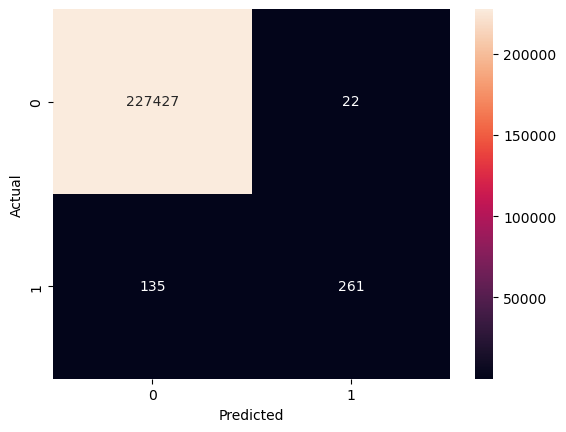

[[227427     22]
 [   135    261]]


In [64]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(confusion)

In [65]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [66]:
#Measures the proportion of correct predictions (both positive and negative) out of the total predictions.
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

#Indicates how well the model identifies positive cases (true positives) among all actual positive cases (true positives + false negatives)
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

#Shows how well the model identifies negative cases (true negatives) among all actual negative cases (true negatives + false positives).
# Specificity
print("Specificity:-", TN / float(TN+FP))

#Combines precision and recall into a single metric, balancing false positives and false negatives.
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993109350655051
Sensitivity:- 0.6590909090909091
Specificity:- 0.9999032750198946
F1-Score:- 0.7687776141384388


#### The classification report provides a comprehensive summary of a classification model’s performance. It includes the following metrics for each class:

In [67]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



In [68]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train)[:,1]

###### The **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)** score is used to evaluate the performance of a binary classification model. It provides a summary of the model's ability to distinguish between the positive and negative classes. 

- **ROC Curve**: Plots the True Positive Rate (TPR or recall) against the False Positive Rate (FPR) across different classification thresholds. It shows how the model's performance varies with different thresholds.

- **AUC (Area Under the Curve)**: Measures the area under the ROC curve. The AUC value ranges from 0 to 1:
  - **AUC = 0.5**: Indicates that the model has no discrimination ability, equivalent to random guessing.
  - **AUC > 0.5**: Indicates that the model has some ability to distinguish between classes, with higher values indicating better performance.
  - **AUC = 1**: Indicates perfect classification with no false positives or false negatives.

ROC-AUC provides a single value that reflects the model's overall performance in distinguishing between the positive and negative classes, regardless of the chosen classification threshold.

In [69]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9850627519962183

In [70]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

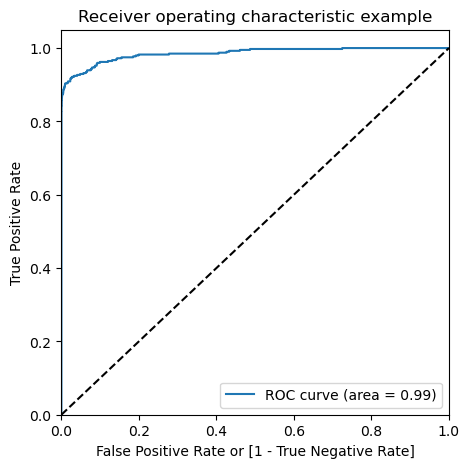

In [71]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

###### ROC-AUC score of 0.99is excellent. It indicates that our model has a high ability to distinguish between the positive and negative classes, with very good performance. A score close to 1 suggests that our model is highly effective at correctly classifying instances of both classes.

#  Test set Prediction


In [72]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

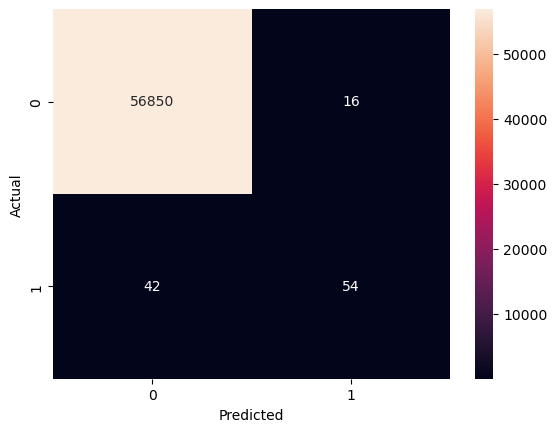

[[56850    16]
 [   42    54]]


In [73]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(confusion)

In [75]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9989817773252344
Sensitivity:- 0.5625
Specificity:- 0.9997186367952731


In [77]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [79]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [80]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9668121475632775

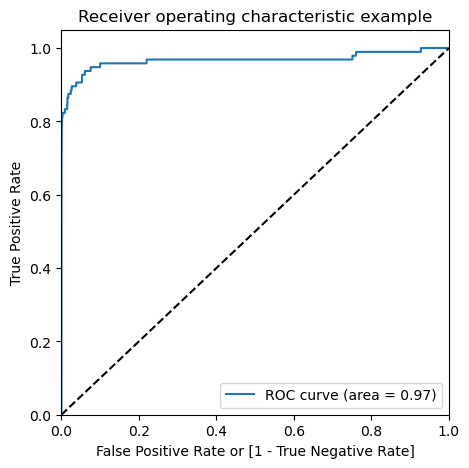

In [81]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary(Logistic Regression)***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.69
    - Specificity = 0.99
    - ROC = 0.98
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.59
    - Specificity = 0.99
    - ROC = 0.97

# XGBoost Model


In [84]:
# Importing XGBoost
from xgboost import XGBClassifier

## Hyperparameter Tuning(XG Boost)

In [85]:
# creating a KFold object
def Xgboost_hyper_parameter(X,y):
    """
    this function is work as a hyperparameter tuning for XGBoost,
    it takes the input in form of x and y and return the best hyperparameter

    Args:
      X:
      y:

    Returns:

    """
    folds = 3

# specify range of hyperparameters
    param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
    xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
    model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
    return model_cv.fit(X,y)

In [86]:
hyper_parameter=Xgboost_hyper_parameter(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [87]:
hyper_parameter

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [88]:
# cv results
cv_results = pd.DataFrame(hyper_parameter.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.121490      0.065538         0.247009        0.007866   
1       8.157896      0.089693         0.255876        0.006055   
2       8.230018      0.192270         0.251381        0.013182   
3       9.472833      0.425387         0.267588        0.055968   
4       8.754158      0.481565         0.225767        0.008228   
5       7.800273      0.017844         0.215482        0.030544   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.971504   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.969237   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.977422   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.959016   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.969186   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.968313   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.972498           0.978483         0.974161        0.003082   
1           0.978238           0.973924         0.973800        0.003676   
2           0.973420           0.977898         0.976247        0.002008   
3           0.955137           0.967728         0.960627        0.005265   
4           0.962236           0.971101         0.967508        0.003809   
5           0.968930           0.977132         0.971458        0.004020   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.999582            0.999761   
1                3            0.999976            0.999969   
2                1            0.999960            0.999977   
3                6            0.999993            0.999959   
4                5            1.000000            1.000000   
5                4            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.999632          0.999658         0.000075  
1            0.999964          0.999970         0.000005  
2            0.999954          0.999964         0.000010  
3            0.999988          0.999980         0.000015  
4            1.000000          1.000000         0.000000  
5            1.000000          1.000000         0.000000

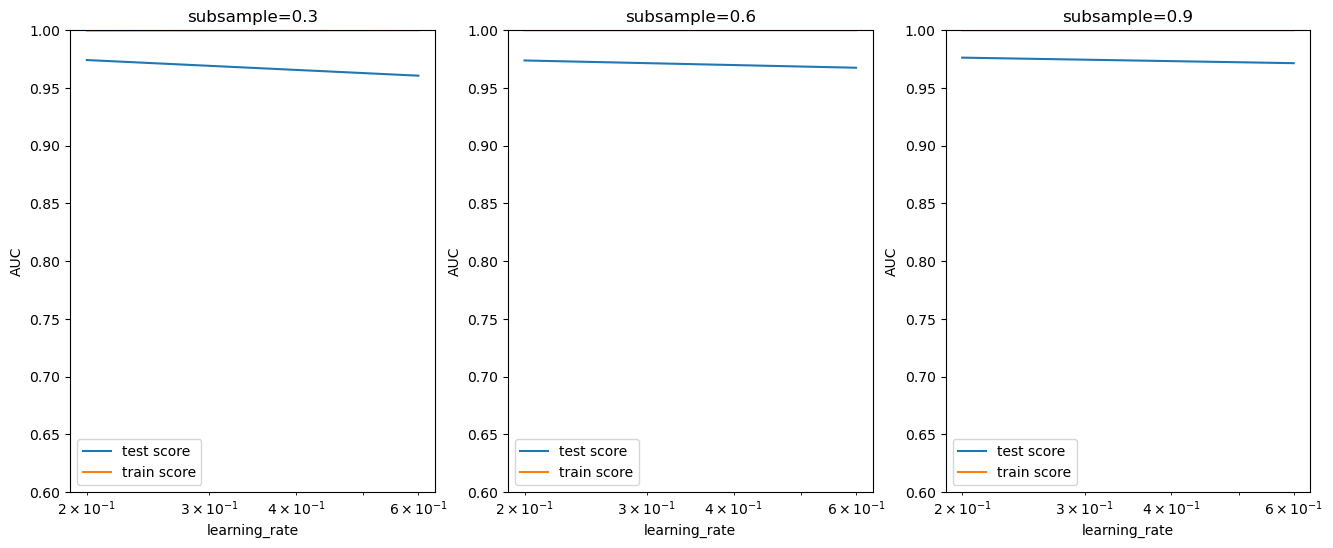

In [90]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='lower left')
    plt.xscale('log')
    plt.savefig('Xgboost_hyperparameter_tuning.jpg')

## Model with optimal hyperparameters


#### We observe that the training score is nearly 1. Among the hyperparameters, the optimal parameters are a learning rate of 0.2 and a subsample rate of 0.3.

In [92]:
hyper_parameter.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [93]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3}, ...)

# Train Set Prediction


In [94]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train)

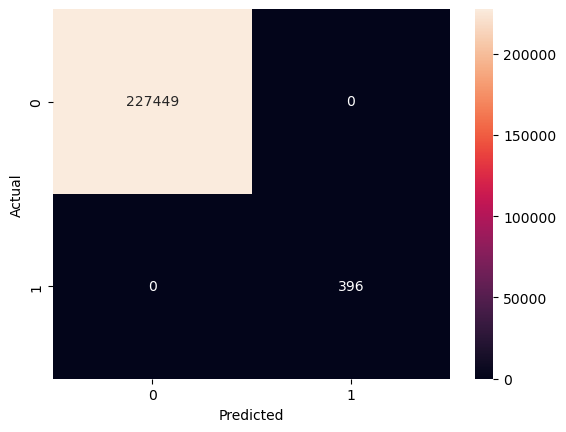

[[227449      0]
 [     0    396]]


In [95]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(confusion)

In [96]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [98]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [99]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train)[:,1]

In [100]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

1.0

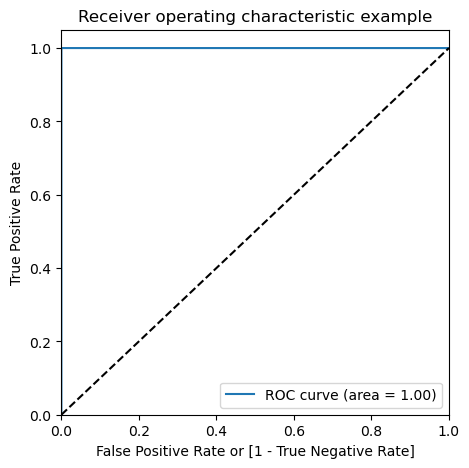

In [101]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

## Test Set Prediction


In [102]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

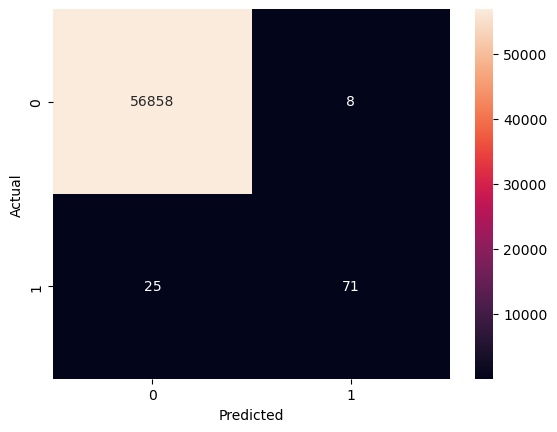

[[56858     8]
 [   25    71]]


In [103]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(confusion)

In [104]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [105]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.999420666409185
Sensitivity:- 0.7395833333333334
Specificity:- 0.9998593183976365


In [106]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [107]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [108]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9723599118981465

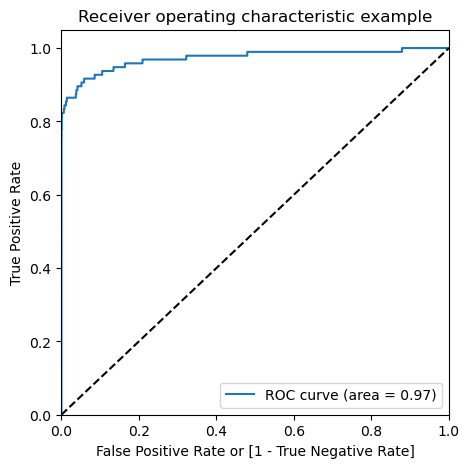

In [109]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Model summary xgboost 

- Train set
    - Accuracy = 1.0
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.73
    - Specificity = *0.99*
    - ROC-AUC = 0.97

# Decision Tree 


In [110]:
from sklearn.tree import DecisionTreeClassifier

## Hyperparameter Tuning(Decision Tree)

In [111]:
# Create the parameter grid
def decision_tree_parameter(X,y):
    """
    this function is work as a hyperparameter tuning for decision tree,
    it takes the input in form of x and y and return the best hyperparameter

    Args:
      X:
      y:

    Returns:

    """
    param_grid = {
     'max_depth': range(5, 15, 5),
     'min_samples_leaf': range(50, 150, 50),
      'min_samples_split': range(50, 150, 50),
     }


# Instantiate the grid search model
    dtree = DecisionTreeClassifier()

    grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
    return grid_search.fit(X,y)

In [112]:
dt_parameter=decision_tree_parameter(X_rus,y_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [113]:
dt_parameter

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [117]:
# cv results
cv_results = pd.DataFrame(dt_parameter.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.018341      0.003887         0.009038        0.000714   
1       0.015610      0.003774         0.008667        0.002568   
2       0.015730      0.004753         0.005358        0.001039   
3       0.014528      0.001601         0.004508        0.003197   
4       0.018804      0.002729         0.005449        0.004636   
5       0.015439      0.000356         0.008685        0.006702   
6       0.008511      0.008102         0.010371        0.007382   
7       0.015832      0.004403         0.005640        0.007976   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.946711   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.950385   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.948548   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.949552   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.953197   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.953053   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.949122   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.949552   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.961920           0.961547         0.956726        0.007083   
1           0.961863           0.967143         0.959797        0.006996   
2           0.951274           0.957300         0.952374        0.003657   
3           0.947257           0.958104         0.951638        0.004667   
4           0.954258           0.969353         0.958936        0.007378   
5           0.961863           0.968607         0.961174        0.006368   
6           0.951274           0.952881         0.951092        0.001540   
7           0.950815           0.956956         0.952441        0.003234   

   rank_test_score  
0                4  
1                2  
2                6  
3                7  
4                3  
5                1  
6                8  
7                5

In [118]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", dt_parameter.best_score_)
print(dt_parameter.best_estimator_)

Best roc_auc:- 0.9611742424242423
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


## Model with optimal hyperparameters

In [119]:
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

## Train Set Prediction


In [120]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train)

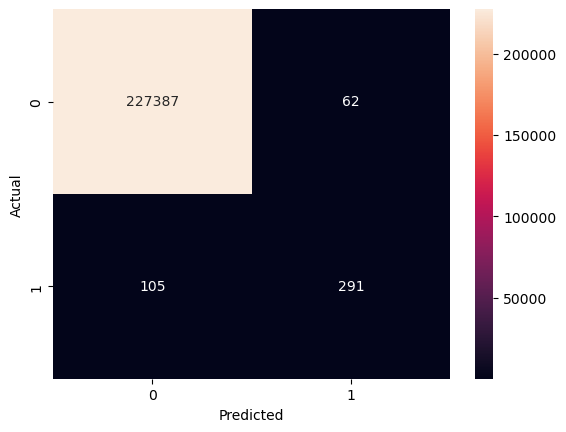

[[227387     62]
 [   105    291]]


In [121]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(confusion)

In [122]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [123]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9992670455792315
Sensitivity:- 0.7348484848484849
Specificity:- 0.9997274114197029


In [124]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.82      0.73      0.78       396

    accuracy                           1.00    227845
   macro avg       0.91      0.87      0.89    227845
weighted avg       1.00      1.00      1.00    227845



In [125]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train)[:,1]

In [126]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9536187954844445

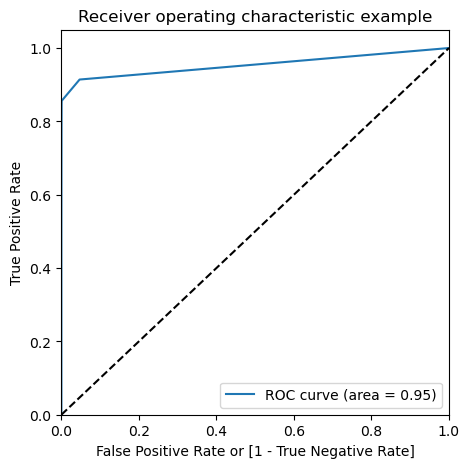

In [127]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

##  Test set Prediction


In [128]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

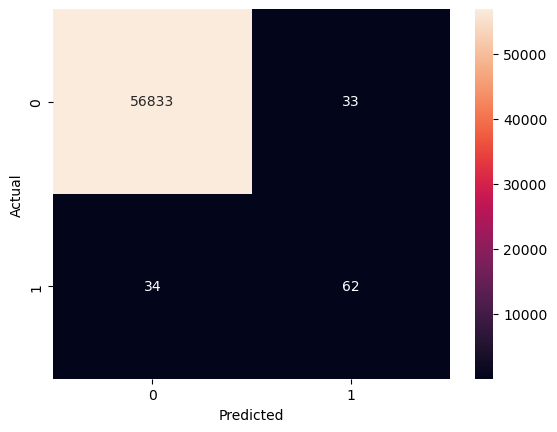

[[56833    33]
 [   34    62]]


In [129]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(confusion)

In [130]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9988237772550121
Sensitivity:- 0.6458333333333334
Specificity:- 0.9994196883902507


In [132]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.65      0.65        96

    accuracy                           1.00     56962
   macro avg       0.83      0.82      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [133]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

In [135]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9219403033740138

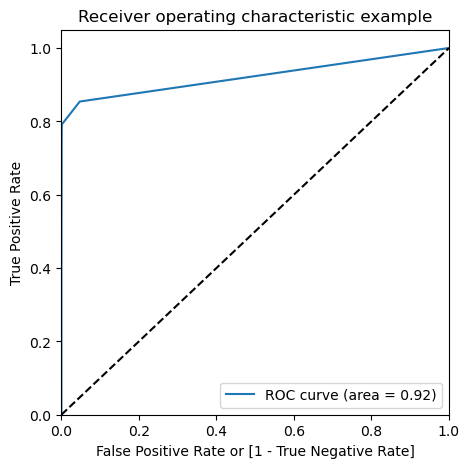

In [136]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Model summary Decision Tree

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.73
    - Specificity = 0.99
    - ROC-AUC = 0.98
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.64
    - Specificity = 0.99
    - ROC-AUC = 0.92

# Oversampling


In [137]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [138]:
# instantiating the random oversampler
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [139]:
# Before sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


### Logistic Regression


In [144]:
over_hyer_parameter=logictic_hyper_parameter(X_train_ros,y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [145]:
# results of grid search CV
cv_results = pd.DataFrame(over_hyer_parameter.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.989731      0.060615         0.097415        0.023097    0.01   
1       1.933466      0.070261         0.090903        0.024713     0.1   
2       1.990413      0.126964         0.107039        0.020960       1   
3       1.993842      0.142410         0.094817        0.023809      10   
4       1.969935      0.108185         0.091203        0.026886     100   
5       1.979574      0.105961         0.095772        0.024321    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.988299           0.988404           0.988609   
1   {'C': 0.1}           0.988308           0.988417           0.988630   
2     {'C': 1}           0.988307           0.988418           0.988632   
3    {'C': 10}           0.988307           0.988418           0.988633   
4   {'C': 100}           0.988307           0.988418           0.988633   
5  {'C': 1000}           0.988307           0.988418           0.988633   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.988664           0.988257         0.988447        0.000163   
1           0.988666           0.988269         0.988458        0.000163   
2           0.988665           0.988271         0.988459        0.000163   
3           0.988666           0.988272         0.988459        0.000163   
4           0.988665           0.988272         0.988459        0.000163   
5           0.988665           0.988272         0.988459        0.000163   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.988514            0.988408   
1                5            0.988530            0.988421   
2                4            0.988531            0.988422   
3                1            0.988531            0.988422   
4                3            0.988531            0.988422   
5                2            0.988531            0.988422   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.988438            0.988523            0.988428   
1            0.988452            0.988537            0.988438   
2            0.988451            0.988537            0.988439   
3            0.988451            0.988537            0.988439   
4            0.988451            0.988537            0.988439   
5            0.988451            0.988537            0.988439   

   mean_train_score  std_train_score  
0          0.988462         0.000047  
1          0.988476         0.000048  
2          0.988476         0.000048  
3          0.988476         0.000048  
4          0.988476         0.000048  
5          0.988476         0.000048

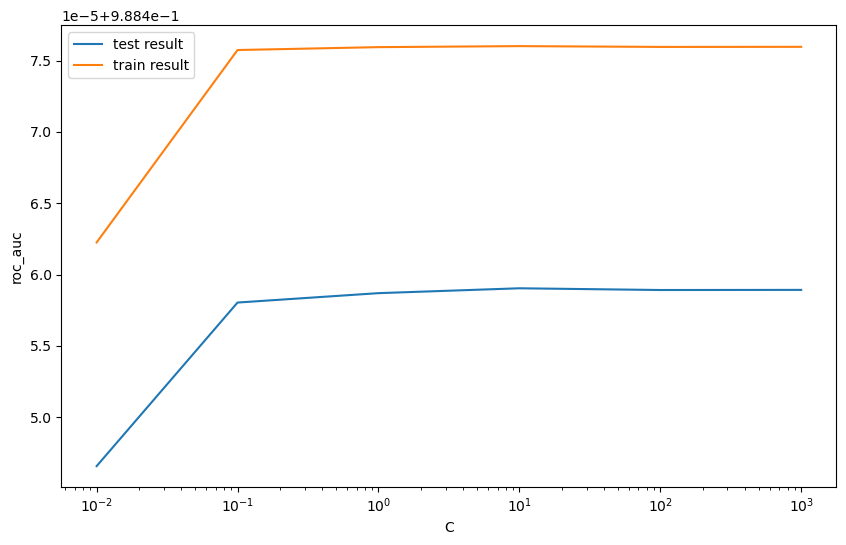

In [146]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [147]:
# Best score with best C
best_score = over_hyer_parameter.best_score_
best_C =over_hyer_parameter.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9884590370581646 at C = 10


## Logistic regression with optimal C


In [148]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.01)

In [149]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

## Train set Prediction


In [150]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

[[222354   5095]
 [ 17890 209559]]


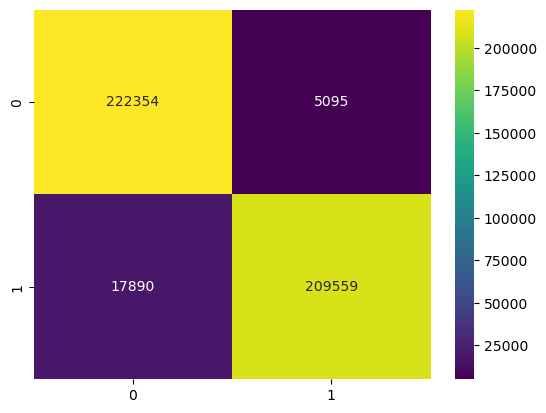

In [151]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
print(confusion)

In [153]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [154]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9494721893699247
Sensitivity:- 0.9213450048142661
Specificity:- 0.9775993739255833
F1-Score:- 0.9480098529075803


In [155]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [156]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [158]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9884633013387663

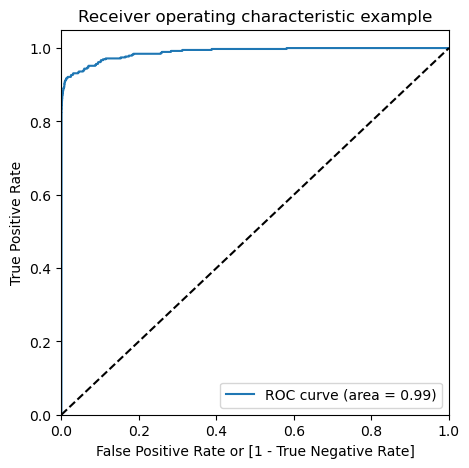

In [159]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

## Test set Prediction


In [160]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

<Axes: >

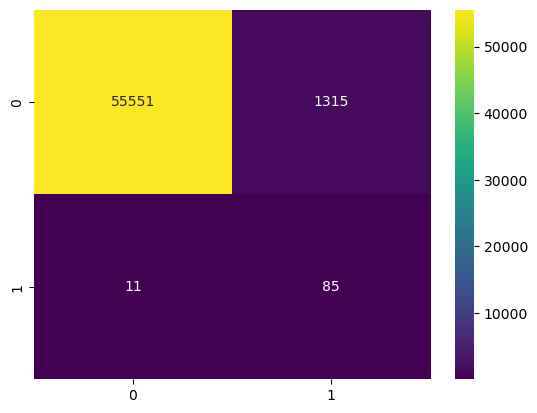

In [161]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
# print(confusion)

In [165]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [166]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1-Score - Use y_test and y_test_pred as you are evaluating on test data
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9767213229872547
Sensitivity:- 0.8854166666666666
Specificity:- 0.9768754616115077
F1-Score:- 0.11363636363636363


In [167]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [168]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

In [169]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9707212826352009

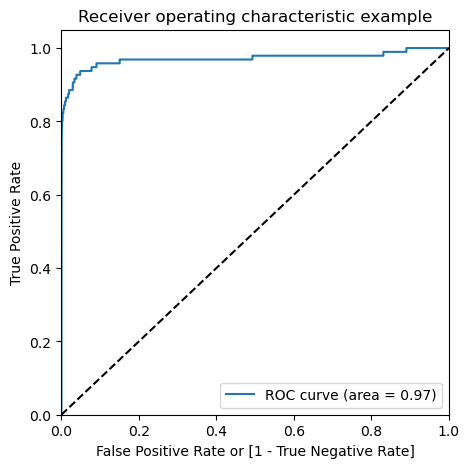

In [170]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Model summary Logistic Regression


- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.97
    - ROC = 0.97
- Test set
    - Accuracy = 0.94
    - Sensitivity = 0.92
    - Specificity = 0.97
    - ROC = 0.97

# XGBoost(Model)


## Hyper Parameter Tuning


In [171]:
over_hyer_parameter=Xgboost_hyper_parameter(X_train_ros,y_train_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [172]:
# cv results
cv_results = pd.DataFrame(over_hyer_parameter.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      14.882147      0.282328         0.454980        0.040293   
1      14.824406      0.372039         0.431571        0.019283   
2      14.426486      0.595716         0.461866        0.011549   
3      17.804470      1.430690         0.533504        0.102782   
4      19.104324      1.680998         0.514562        0.047755   
5      16.792902      0.372106         0.414457        0.089249   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999905   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999886   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999905   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999989   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999987   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999993   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999907           0.999890         0.999901        0.000008   
1           0.999919           0.999906         0.999903        0.000013   
2           0.999920           0.999898         0.999908        0.000009   
3           0.999985           0.999971         0.999982        0.000008   
4           0.999990           0.999974         0.999983        0.000007   
5           0.999986           0.999972         0.999984        0.000009   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.999922            0.999907   
1                5            0.999909            0.999925   
2                4            0.999918            0.999918   
3                3            0.999996            0.999995   
4                2            0.999998            0.999999   
5                1            0.999997            0.999997   

   split2_train_score  mean_train_score  std_train_score  
0            0.999919          0.999916     6.831279e-06  
1            0.999918          0.999917     6.536344e-06  
2            0.999916          0.999918     8.983063e-07  
3            0.999997          0.999996     9.145753e-07  
4            1.000000          0.999999     8.919066e-07  
5            0.999999          0.999998     1.029366e-06

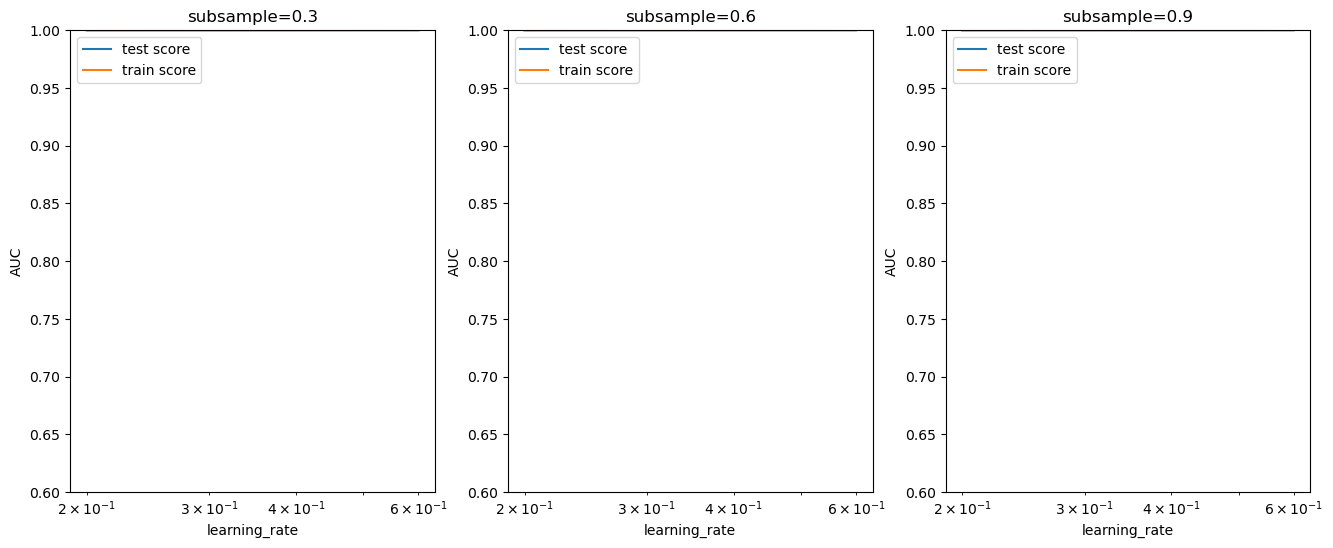

In [173]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

## Model with optimal hyperparameters
We observe that the training score is nearly 1. Therefore, the optimal hyperparameters are a learning rate of 0.2 and a subsample rate of 0.3.

In [174]:
over_hyer_parameter.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [175]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

In [177]:
# Train Set Predictions
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

[[227449      0]
 [     0 227449]]


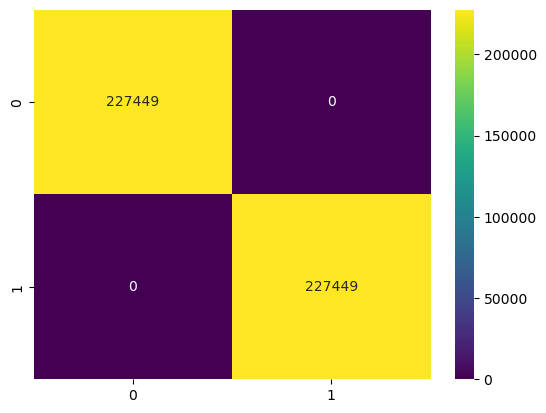

In [178]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
print(confusion)

In [179]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [180]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [181]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [182]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [184]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

1.0

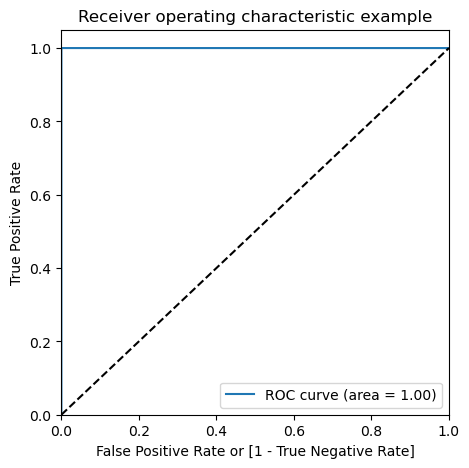

In [185]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

## Test set Prediction


In [186]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

[[56854    12]
 [   23    73]]


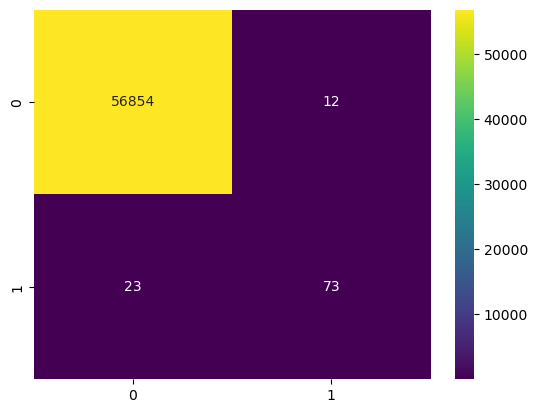

In [187]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
print(confusion)

In [188]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [189]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.999385555282469
Sensitivity:- 0.7604166666666666
Specificity:- 0.9997889775964548


In [190]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.86      0.76      0.81        96

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [191]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

In [194]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.976309804335338

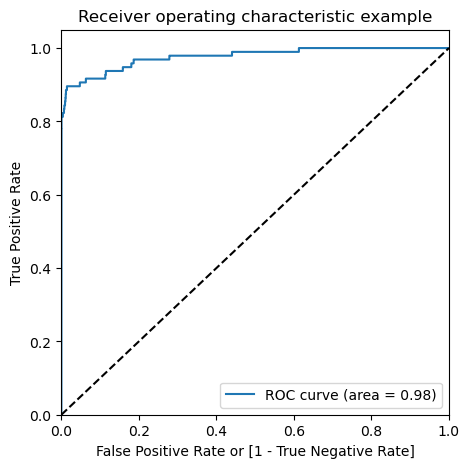

In [195]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Model summary XGBoost

- Train set
    - Accuracy = 1.0
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.76
    - Specificity = 0.99
    - ROC-AUC = 0.98

# Decision Tree


In [196]:
over_hyer_parameter=decision_tree_parameter(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


## Hyperparameter Tuning

In [249]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [197]:
# cv results
cv_results = pd.DataFrame(over_hyer_parameter.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      11.222203      0.336465         0.159839        0.006059   
1      11.769130      0.487484         0.155706        0.008871   
2      11.657980      0.412662         0.153314        0.001847   
3      12.017752      0.255967         0.165926        0.009924   
4      17.787275      0.210523         0.159726        0.008123   
5      17.305173      0.134480         0.153593        0.004559   
6      17.627145      0.107765         0.165099        0.007021   
7      17.916646      0.180127         0.156720        0.005351   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.990248   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.990247   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.990232   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.990232   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.999635   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.999647   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.999584   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.999582   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.990360           0.990466         0.990358        0.000089   
1           0.990357           0.990451         0.990352        0.000084   
2           0.990284           0.990322         0.990279        0.000037   
3           0.990279           0.990322         0.990278        0.000037   
4           0.999633           0.999609         0.999626        0.000012   
5           0.999664           0.999567         0.999626        0.000043   
6           0.999559           0.999494         0.999546        0.000038   
7           0.999569           0.999469         0.999540        0.000050   

   rank_test_score  
0                5  
1                6  
2                7  
3                8  
4                2  
5                1  
6                3  
7                4

In [198]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", over_hyer_parameter.best_score_)
print(over_hyer_parameter.best_estimator_)

Best roc_auc:- 0.9996261085917059
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


##  Model with optimal hyperparameters

In [202]:
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##  Train set Prediction


In [203]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

[[226105   1344]
 [     0 227449]]


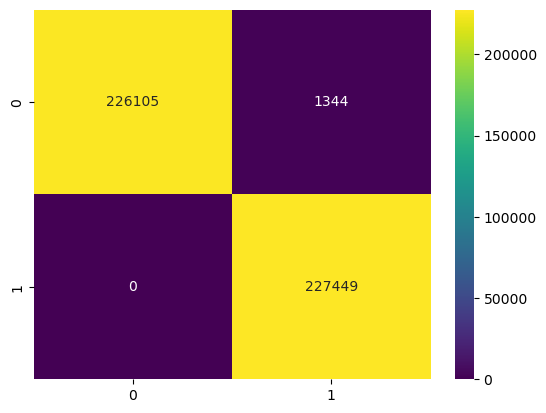

In [205]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
print(confusion)

In [206]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [207]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9970454915167796
Sensitivity:- 1.0
Specificity:- 0.9940909830335591


In [208]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [209]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [210]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9997296538740986

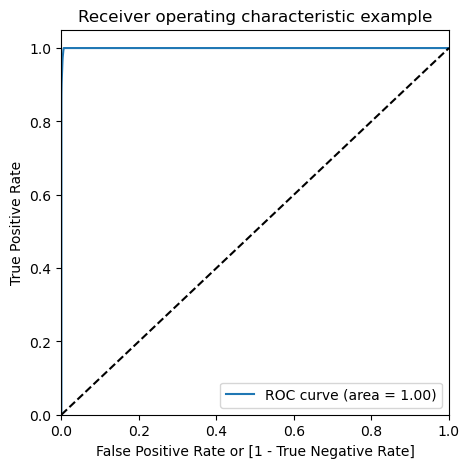

In [211]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

## Test set Prediction


In [212]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

[[56480   386]
 [   21    75]]


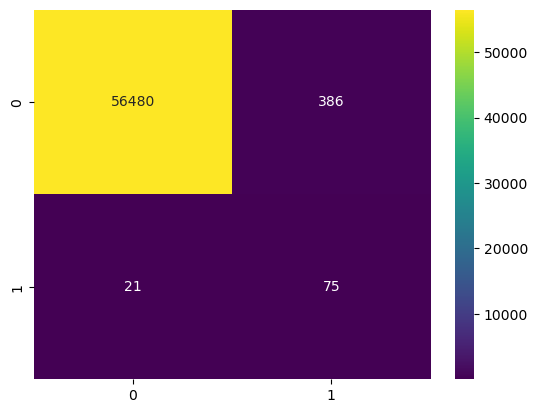

In [213]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
print(confusion)

In [214]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [215]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9928548857132825
Sensitivity:- 0.78125
Specificity:- 0.9932121126859635


In [216]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.16      0.78      0.27        96

    accuracy                           0.99     56962
   macro avg       0.58      0.89      0.63     56962
weighted avg       1.00      0.99      1.00     56962



In [217]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [218]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8896154995955404

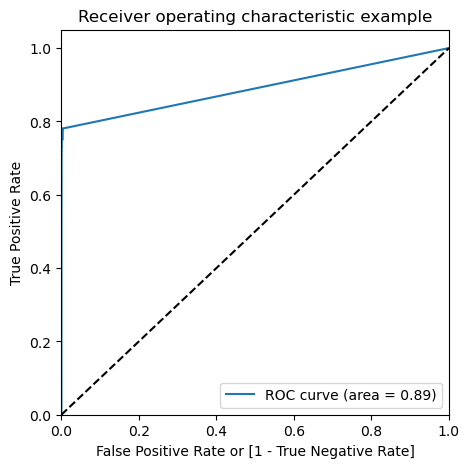

In [219]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Model summary Decision Tree

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 1
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.79
    - Specificity = 0.99
    - ROC-AUC = 0.89

# SMOTE (Synthetic Minority Oversampling Technique)


##### **SMOTE (Synthetic Minority Over-sampling Technique)** is used to address class imbalance in datasets by generating synthetic examples for the minority class. Here’s how it helps:

1. **Balancing Classes**: SMOTE helps in creating a more balanced dataset by generating new synthetic instances of the minority class, thus reducing class imbalance and improving the model's ability to learn from the minority class.

2. **Improving Model Performance**: By increasing the representation of the minority class, SMOTE can enhance the performance of classification models, making them more sensitive and accurate in identifying minority class instances.

3. **Reducing Overfitting**: Unlike simple oversampling, which duplicates existing minority class instances, SMOTE generates new, unique data points. This reduces the risk of overfitting that can occur when the model memorizes duplicated examples.

4. **Enhancing Generalization**: Synthetic data points created by SMOTE are designed to be similar to existing data but with slight variations. This can help the model generalize better and perform well on unseen data.

**Overall, SMOTE is a valuable technique for improving model performance in scenarios where the dataset is heavily imbalanced, particularly in binary classification problems.**

In [220]:
# Importing SMOTE

from imblearn.over_sampling import SMOTE

In [221]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train) # Use fit_resample instead of fit_sample

In [222]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


### Logistic Regression


In [223]:
smote_hyper_parameter=logictic_hyper_parameter(X_train_smote,y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [224]:
# results of grid search CV
cv_results = pd.DataFrame(smote_hyper_parameter.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.952584      0.130501         0.083325        0.005820    0.01   
1       2.000099      0.170340         0.100821        0.021280     0.1   
2       1.960144      0.111100         0.090897        0.025184       1   
3       2.008587      0.089632         0.103537        0.027541      10   
4       1.910370      0.043555         0.098361        0.026722     100   
5       2.035664      0.029066         0.098884        0.021599    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.989805           0.989796           0.989484   
1   {'C': 0.1}           0.989834           0.989807           0.989488   
2     {'C': 1}           0.989836           0.989807           0.989486   
3    {'C': 10}           0.989836           0.989807           0.989486   
4   {'C': 100}           0.989836           0.989807           0.989486   
5  {'C': 1000}           0.989836           0.989807           0.989486   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.989631           0.989910         0.989725        0.000150   
1           0.989632           0.989942         0.989741        0.000161   
2           0.989630           0.989944         0.989741        0.000162   
3           0.989630           0.989945         0.989741        0.000163   
4           0.989630           0.989945         0.989741        0.000163   
5           0.989630           0.989945         0.989741        0.000163   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.989758            0.989666   
1                1            0.989780            0.989686   
2                2            0.989781            0.989687   
3                5            0.989781            0.989687   
4                3            0.989781            0.989687   
5                4            0.989781            0.989687   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.989760            0.989841            0.989682   
1            0.989772            0.989853            0.989700   
2            0.989772            0.989852            0.989701   
3            0.989772            0.989852            0.989701   
4            0.989772            0.989852            0.989701   
5            0.989772            0.989852            0.989701   

   mean_train_score  std_train_score  
0          0.989741         0.000063  
1          0.989758         0.000060  
2          0.989758         0.000060  
3          0.989758         0.000060  
4          0.989758         0.000060  
5          0.989758         0.000060

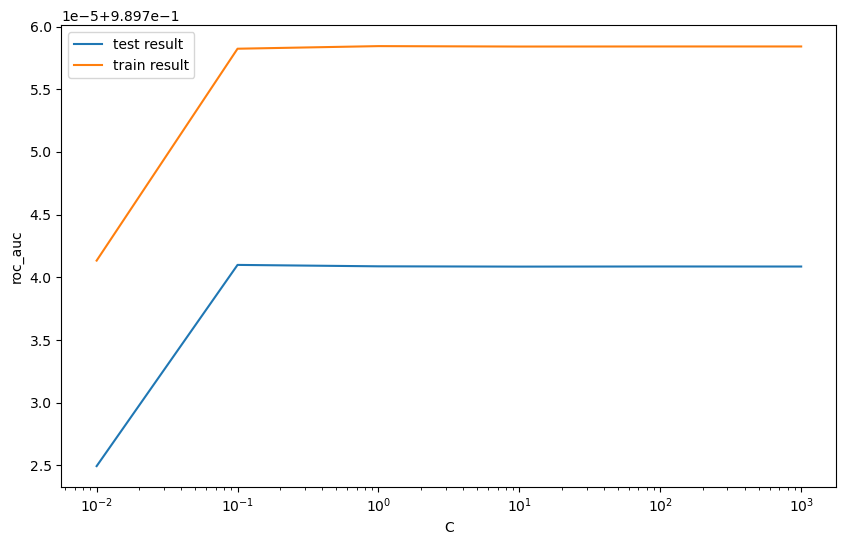

In [225]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [226]:
# Best score with best C
best_score = smote_hyper_parameter.best_score_
best_C = smote_hyper_parameter.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897409900830768 at C = 0.1


## Logistic regression with optimal C


In [227]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [228]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

##  Train set Prediction


In [230]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

[[221911   5538]
 [ 17693 209756]]


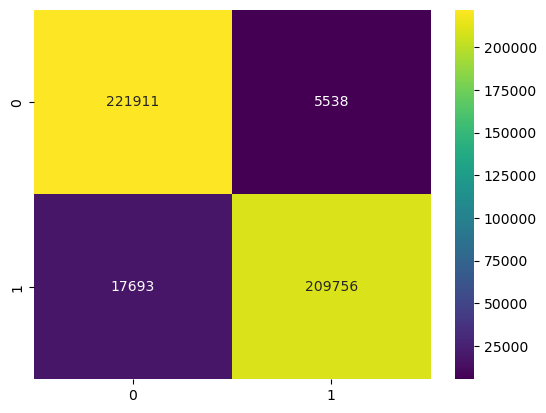

In [231]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
print(confusion)

In [232]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [233]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9489314087993352
Sensitivity:- 0.9222111330452102
Specificity:- 0.9756516845534603


In [234]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [235]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

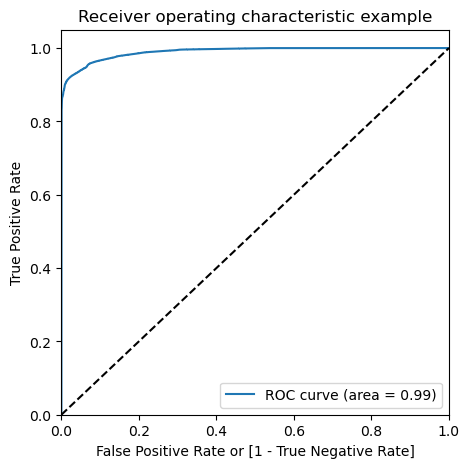

In [236]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

##  Test set Prediction


In [237]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

[[55416  1450]
 [   10    86]]


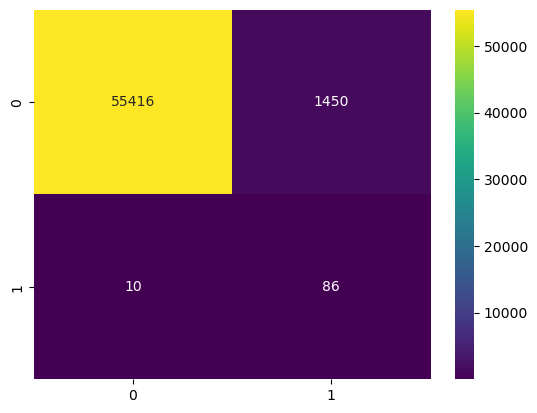

In [238]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
print(confusion)

In [239]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [240]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9743688774972789
Sensitivity:- 0.8958333333333334
Specificity:- 0.9745014595716245


In [241]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



## ROC on the test set


In [242]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

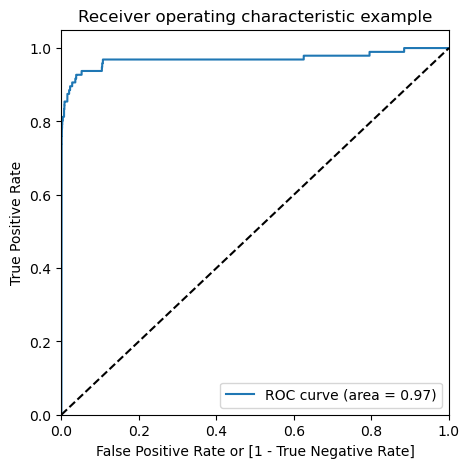

In [243]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Model summary Logistic Regression

- Train set
    - Accuracy = 0.94
    - Sensitivity = 0.92
    - Specificity = 0.97
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.90
    - Specificity = 0.97
    - ROC = 0.97

# XGBoost


In [244]:
smote_hyper_parameter=Xgboost_hyper_parameter(X_train_smote,y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [245]:
# cv results
cv_results = pd.DataFrame(smote_hyper_parameter.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      14.529310      0.500013         0.481587        0.026127   
1      14.343779      0.250524         0.416712        0.039552   
2      14.285790      0.381147         0.492717        0.058925   
3      15.347357      0.419420         0.423534        0.013029   
4      16.439185      0.298163         0.471810        0.025458   
5      14.660132      0.399332         0.456232        0.023122   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999680   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999638   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999653   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999946   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999962   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999961   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999733           0.999688         0.999700        0.000023   
1           0.999685           0.999643         0.999655        0.000021   
2           0.999713           0.999666         0.999677        0.000026   
3           0.999949           0.999958         0.999951        0.000005   
4           0.999960           0.999948         0.999957        0.000006   
5           0.999959           0.999947         0.999956        0.000006   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999734            0.999717   
1                6            0.999697            0.999665   
2                5            0.999709            0.999690   
3                3            0.999971            0.999976   
4                1            0.999978            0.999980   
5                2            0.999975            0.999976   

   split2_train_score  mean_train_score  std_train_score  
0            0.999732          0.999728     7.836593e-06  
1            0.999700          0.999687     1.564702e-05  
2            0.999717          0.999705     1.139169e-05  
3            0.999983          0.999976     4.730254e-06  
4            0.999980          0.999979     1.054078e-06  
5            0.999977          0.999976     8.060376e-07

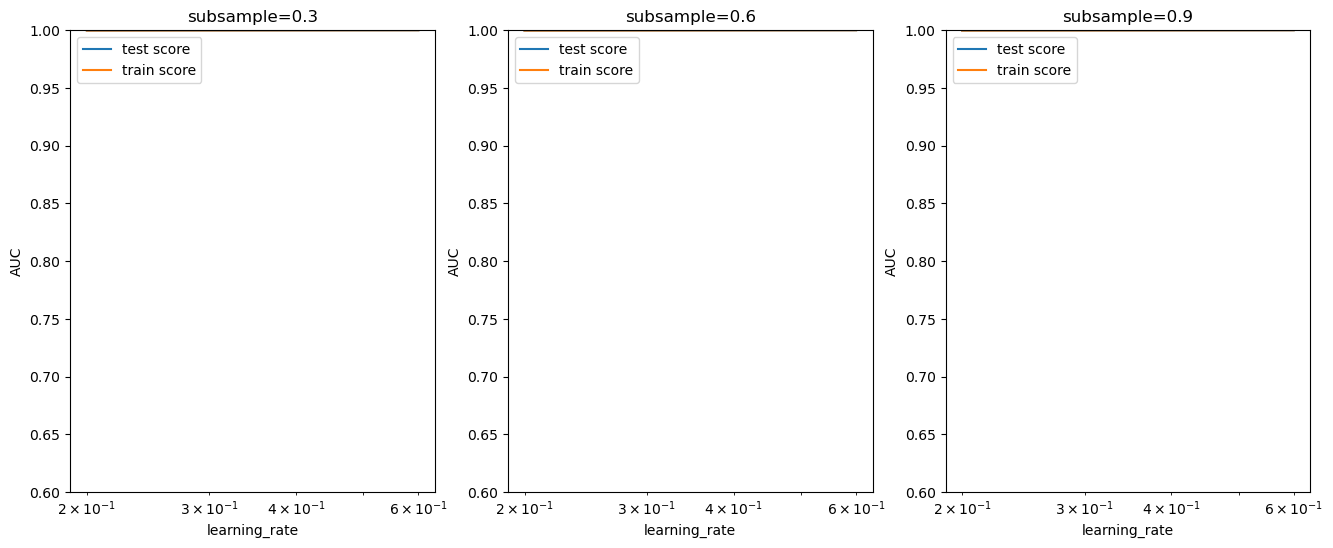

In [246]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

# Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [247]:
smote_hyper_parameter.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [248]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

##  Train set Prediction


In [249]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

[[227448      1]
 [     0 227449]]


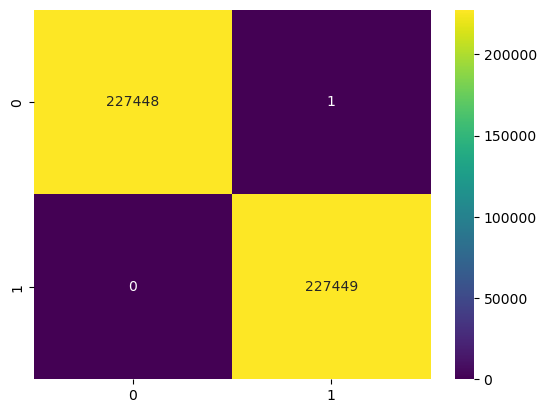

In [250]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
print(confusion)

In [251]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [252]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999978017049976
Sensitivity:- 1.0
Specificity:- 0.9999956034099952


In [253]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [254]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [255]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9999999890785479

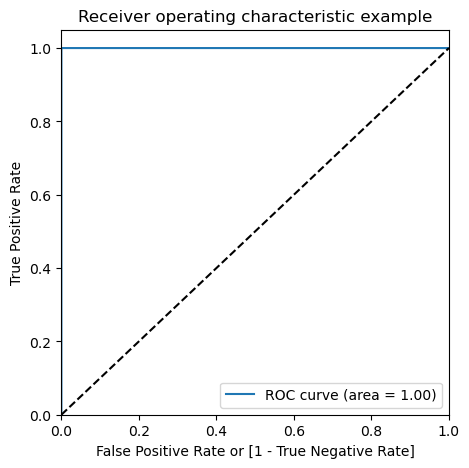

In [256]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##  Test set Prediction


In [257]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

[[56833    33]
 [   20    76]]


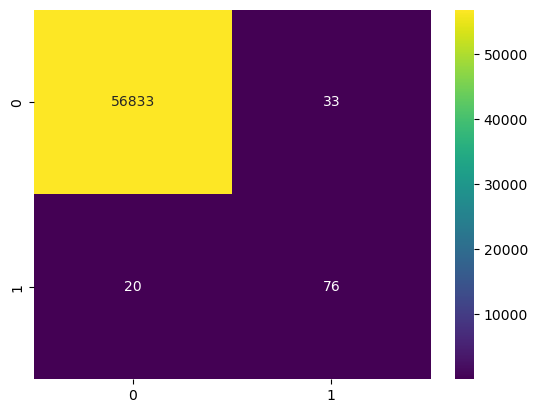

In [258]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
print(confusion)

In [259]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [261]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9990695551420246
Sensitivity:- 0.7916666666666666
Specificity:- 0.9994196883902507


In [262]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.70      0.79      0.74        96

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [263]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [264]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9553290117703608

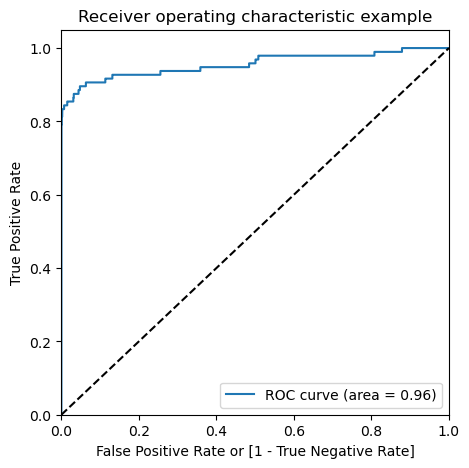

In [265]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Model summary XGBoost

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.78
    - Specificity = 0.99
    - ROC-AUC =0 .96

Overall, the model is performing well in the test set, what it had learnt from the train set.

# Decision Tree


## Hyperparameter Tuning

In [266]:
smote_hyper_parameter=decision_tree_parameter(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [268]:
# cv results
cv_results = pd.DataFrame(smote_hyper_parameter.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      20.278716      0.634968         0.158865        0.003436   
1      19.357722      0.084920         0.163225        0.006909   
2      19.420665      0.210421         0.178790        0.019472   
3      20.031045      0.093419         0.162451        0.007430   
4      35.807794      0.354071         0.185782        0.013239   
5      35.980685      0.305409         0.178292        0.007934   
6      35.820335      0.369955         0.183793        0.014456   
7      35.677291      0.479864         0.182841        0.006349   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.986127   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.986127   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.986066   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.986073   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.998169   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.998144   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.998097   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.998063   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.985688           0.984838         0.985551        0.000535   
1           0.985690           0.984839         0.985552        0.000535   
2           0.985642           0.984773         0.985494        0.000538   
3           0.985637           0.984772         0.985494        0.000540   
4           0.998142           0.998012         0.998108        0.000069   
5           0.998121           0.997971         0.998079        0.000077   
6           0.998101           0.997910         0.998036        0.000089   
7           0.998080           0.997906         0.998016        0.000078   

   rank_test_score  
0                6  
1                5  
2                8  
3                7  
4                1  
5                2  
6                3  
7                4

In [269]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", smote_hyper_parameter.best_score_)
print(smote_hyper_parameter.best_estimator_)

Best roc_auc:- 0.9981077106251707
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


### Model with optimal hyperparameters

In [270]:
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

## Train set Prediction


In [271]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

[[223809   3640]
 [  2374 225075]]


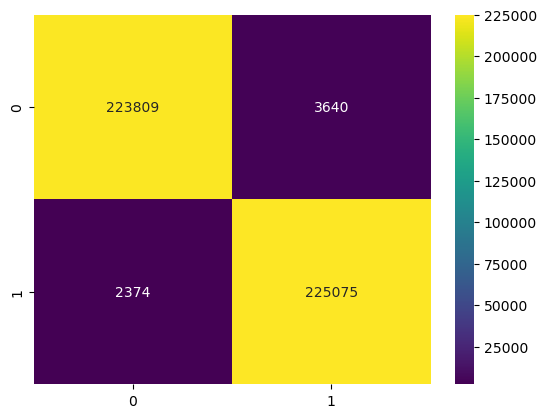

In [272]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
print(confusion)

In [273]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [274]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9867794538555896
Sensitivity:- 0.9895624953286232
Specificity:- 0.9839964123825561


In [275]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



In [277]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [278]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9986355757920081

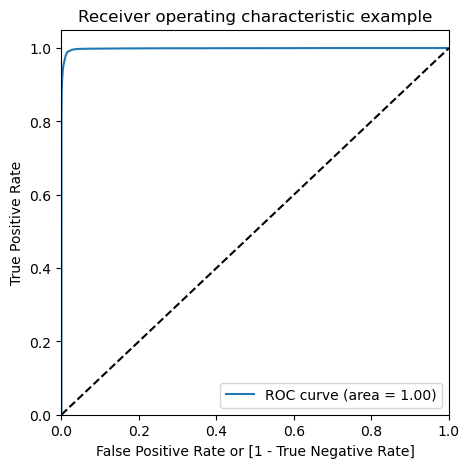

In [279]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##  Test set Prediction


In [280]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

[[55852  1014]
 [   19    77]]


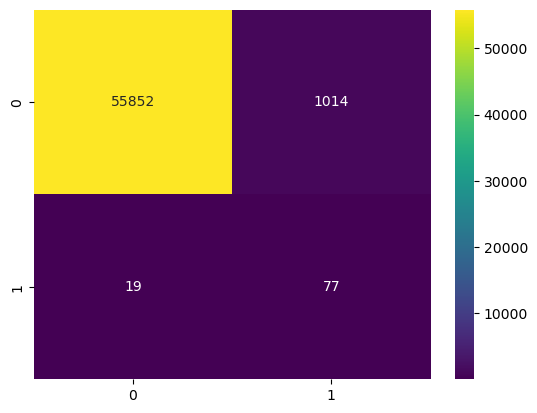

In [281]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
print(confusion)

In [282]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [283]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9818651030511569
Sensitivity:- 0.8020833333333334
Specificity:- 0.9821686069004326


In [284]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [285]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [286]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8551876157692353

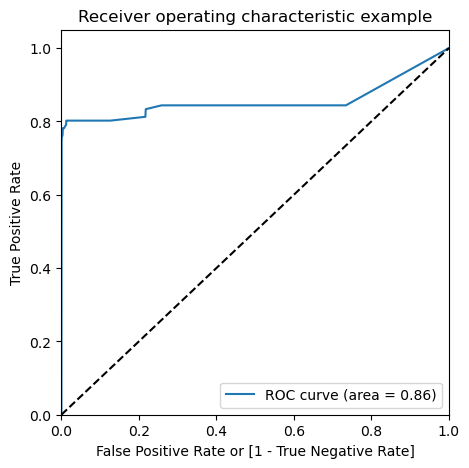

In [287]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model summary Decision Tree-3

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.98
    - Specificity = 0.98
    - ROC-AUC = 1
- Test set
    - Accuracy = 0.98
    - Sensitivity = 0.80
    - Specificity = 0.98
    - ROC-AUC = 0.86


## AdaSyn (Adaptive Synthetic Sampling)


#### In addition to the primary uses of ADASYN, here are some other notable benefits and applications:

1. **Handling High-Dimensional Data**: ADASYN can be particularly effective in high-dimensional spaces where the minority class might be spread out and less clearly defined. By generating synthetic samples in critical regions, ADASYN helps the model to better navigate complex feature spaces.

2. **Improving Performance in Real-World Scenarios**: In practical applications like fraud detection, medical diagnosis, or rare event prediction, ADASYN enhances the model’s sensitivity and precision by focusing on challenging and often crucial areas of the data.

3. **Complementing Other Resampling Techniques**: ADASYN can be used alongside other techniques such as SMOTE or traditional undersampling methods. Combining these techniques can create a more balanced dataset and improve overall model performance.

4. **Enhancing Cross-Validation**: By creating synthetic data that is representative of difficult-to-classify regions, ADASYN can lead to more reliable cross-validation results, as the model is better trained on challenging examples.

5. **Reducing Overfitting**: By generating new data points in areas where the minority class is less frequent, ADASYN can help prevent overfitting to the minority class, leading to better generalization on unseen data.

6. **Supporting Ensemble Methods**: ADASYN-generated samples can be used to train ensemble models, such as bagging or boosting, which can benefit from a more balanced and robust dataset, leading to improved ensemble performance.

Overall, ADASYN is a versatile tool that enhances model performance and robustness by strategically generating synthetic samples in regions where the minority class is less represented.

In [288]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [289]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [290]:
# Before sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227448})


In [251]:
# Splitting data into train and test set 80:20
# X_train_adasyn, X_test, y_train_adasyn, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# Logistic Regression


In [291]:
adasyn_hyper_parameter=logictic_hyper_parameter(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [292]:
# results of grid search CV
cv_results = pd.DataFrame(adasyn_hyper_parameter.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       2.120889      0.131473         0.081848        0.006394    0.01   
1       2.167991      0.044849         0.084809        0.007503     0.1   
2       2.278995      0.080927         0.087966        0.006052       1   
3       2.278590      0.101932         0.094399        0.000214      10   
4       2.238197      0.106612         0.091214        0.006148     100   
5       2.271672      0.103483         0.089938        0.006352    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.963477           0.962841           0.963241   
1   {'C': 0.1}           0.963543           0.962952           0.963337   
2     {'C': 1}           0.963547           0.962962           0.963345   
3    {'C': 10}           0.963548           0.962963           0.963345   
4   {'C': 100}           0.963548           0.962963           0.963346   
5  {'C': 1000}           0.963548           0.962963           0.963346   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.962839           0.962849         0.963049        0.000264   
1           0.962877           0.962941         0.963130        0.000263   
2           0.962878           0.962948         0.963136        0.000263   
3           0.962878           0.962949         0.963137        0.000263   
4           0.962878           0.962949         0.963137        0.000263   
5           0.962878           0.962949         0.963137        0.000263   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.962976            0.963010   
1                5            0.963062            0.963093   
2                4            0.963069            0.963099   
3                3            0.963070            0.963099   
4                2            0.963070            0.963100   
5                1            0.963070            0.963100   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.962980            0.963321            0.963087   
1            0.963056            0.963401            0.963169   
2            0.963062            0.963406            0.963174   
3            0.963062            0.963407            0.963174   
4            0.963062            0.963407            0.963174   
5            0.963062            0.963407            0.963174   

   mean_train_score  std_train_score  
0          0.963075         0.000129  
1          0.963156         0.000129  
2          0.963162         0.000128  
3          0.963163         0.000129  
4          0.963163         0.000129  
5          0.963163         0.000129

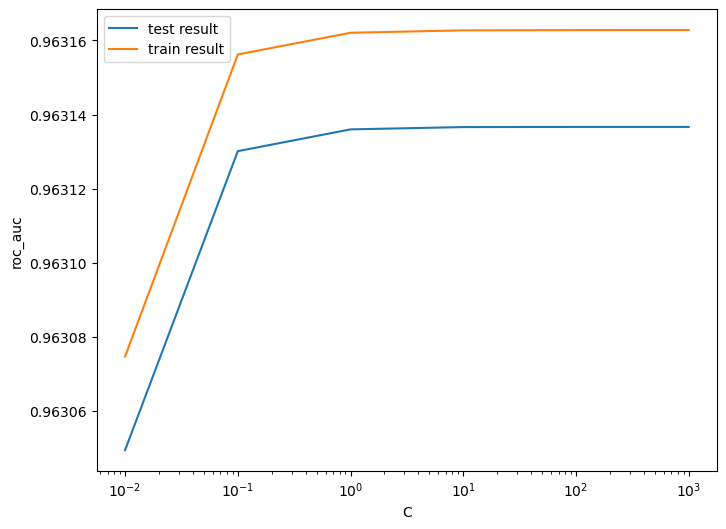

In [293]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [294]:
# Best score with best C
best_score = adasyn_hyper_parameter.best_score_
best_C = adasyn_hyper_parameter.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9631366528168902 at C = 1000


# Logistic regression with optimal C


In [296]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [297]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

#  Train set Prediction


In [298]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

[[207019  20430]
 [ 31286 196162]]


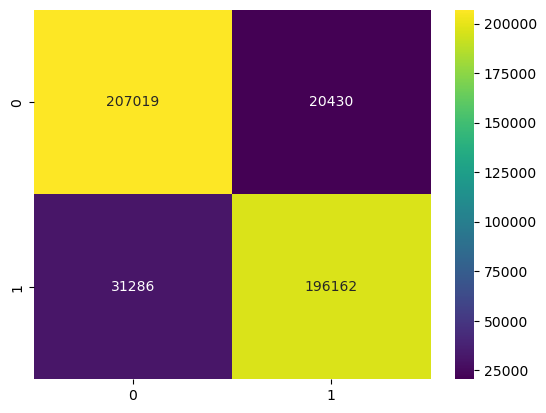

In [299]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
print(confusion)

In [300]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [301]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

Accuracy:- 0.8863127257379143
Sensitivity:- 0.862447680348915
Specificity:- 0.9101776662020936
F1-Score:- 0.8835330150436899


In [302]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897



In [303]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [304]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9631610161614914

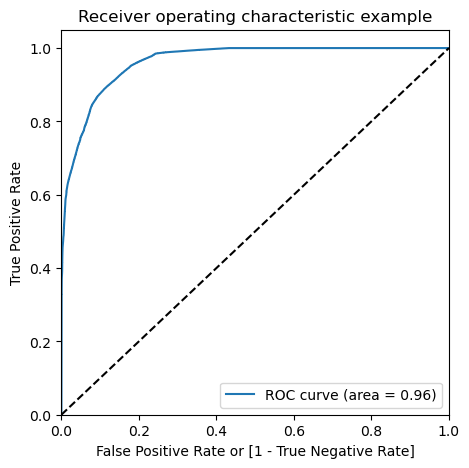

In [305]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

# Test set Prediction


In [306]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

[[51642  5224]
 [    4    92]]


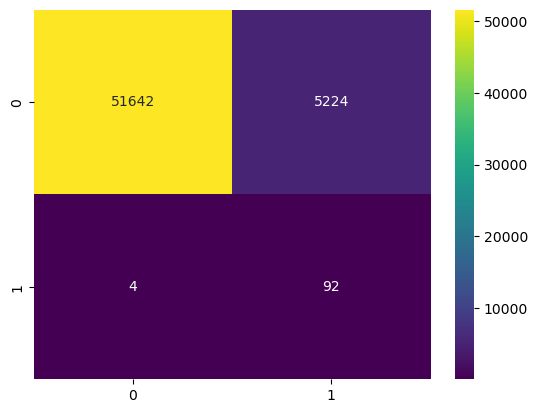

In [307]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
print(confusion)

In [308]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [309]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9082195147642288
Sensitivity:- 0.9583333333333334
Specificity:- 0.9081349136566665


In [310]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [311]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [312]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9671573487086602

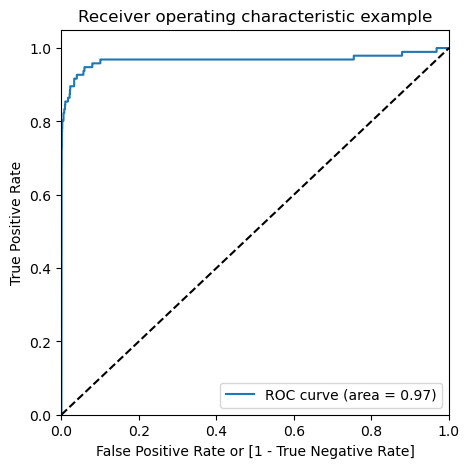

In [313]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary Logistic Regression-4***

- Train set
    - Accuracy = 0.88
    - Sensitivity = 0.86
    - Specificity = 0.91
    - ROC = 0.96
- Test set
    - Accuracy = 0.90
    - Sensitivity = 0.95
    - Specificity = 0.90
    - ROC = 0.97

# Decision Tree


In [314]:
adasyn_hyper_parameter=decision_tree_parameter(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [315]:
# cv results
cv_results = pd.DataFrame(adasyn_hyper_parameter.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      16.888374      0.043370         0.146669        0.007953   
1      16.563278      0.135163         0.153221        0.002931   
2      16.438125      0.032135         0.152441        0.003292   
3      16.404814      0.014575         0.153109        0.002946   
4      29.542509      0.341323         0.153044        0.005054   
5      29.778536      0.632507         0.162281        0.007389   
6      28.689673      0.667231         0.149580        0.005999   
7      29.184881      0.513261         0.155755        0.000743   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.902958   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.902958   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.902958   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.902958   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.933825   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.933869   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.936652   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.937847   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.920355           0.909332         0.910882        0.007186   
1           0.920355           0.909332         0.910882        0.007186   
2           0.920310           0.913511         0.912260        0.007139   
3           0.920316           0.911441         0.911572        0.007087   
4           0.946201           0.937046         0.939024        0.005242   
5           0.946184           0.936120         0.938724        0.005354   
6           0.943873           0.941529         0.940685        0.003008   
7           0.944914           0.943721         0.942161        0.003089   

   rank_test_score  
0                8  
1                7  
2                5  
3                6  
4                3  
5                4  
6                2  
7                1

In [316]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", adasyn_hyper_parameter.best_score_)
print(adasyn_hyper_parameter.best_estimator_)

Best roc_auc:- 0.9421608139856147
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


# Model with optimal hyperparameters

In [317]:
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

#  Train set Prediction


In [318]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

[[215929  11520]
 [  1118 226330]]


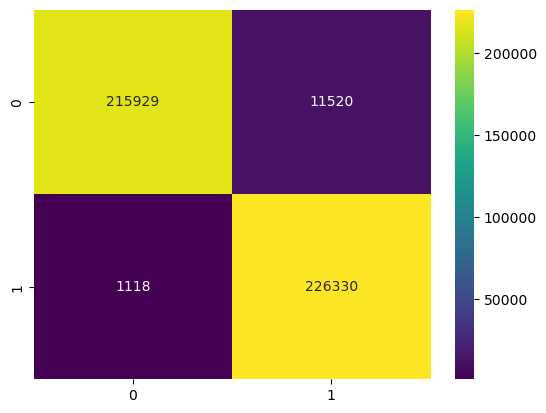

In [319]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
print(confusion)

In [320]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [321]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9722178866864367
Sensitivity:- 0.9950845907636031
Specificity:- 0.9493512831447929


In [322]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227449
           1       0.95      1.00      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



In [323]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [324]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9917591040224101

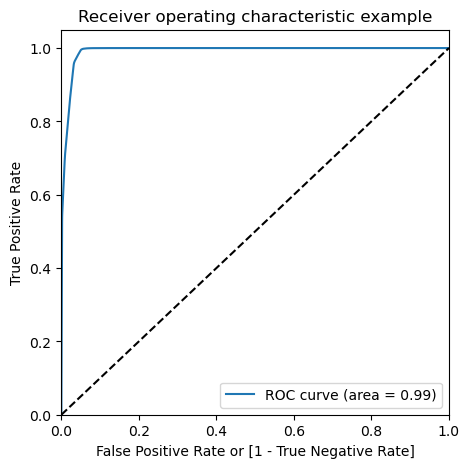

In [325]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

## Test set Prediction


In [326]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

[[53880  2986]
 [   15    81]]


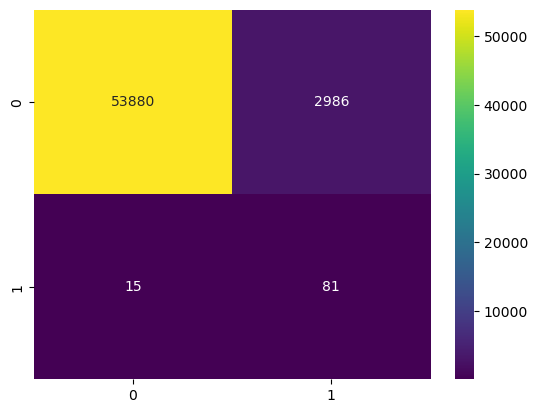

In [327]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
print(confusion)

In [328]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [329]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9473157543625575
Sensitivity:- 0.84375
Specificity:- 0.9474905919178419


In [399]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [330]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [331]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9141440147305362

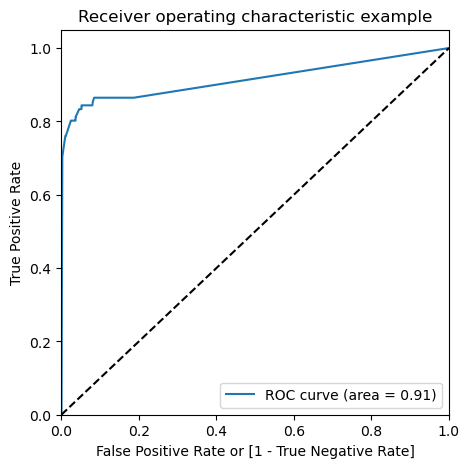

In [332]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Model summary Decision Tree

- Train set
    - Accuracy = 0.97
    - Sensitivity = 0.99
    - Specificity = 0.94
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.94
    - Sensitivity = 0.84
    - Specificity = 0.94
    - ROC-AUC = 0.91

# XGBoost


In [333]:
adasyn_hyper_parameter=Xgboost_hyper_parameter(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [334]:
# cv results
cv_results = pd.DataFrame(adasyn_hyper_parameter.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.512009      0.195744         0.287774        0.008272   
1       9.722944      0.112427         0.302266        0.013415   
2       9.504828      0.112336         0.301627        0.009343   
3       9.457727      0.230064         0.281222        0.001983   
4       9.763464      0.048309         0.285608        0.015187   
5       9.616710      0.057300         0.320629        0.011059   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.975778   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.976064   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.976420   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.973514   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.973739   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.979383   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.996402           0.993919         0.988700        0.009193   
1           0.995991           0.995207         0.989087        0.009214   
2           0.996090           0.993491         0.988667        0.008725   
3           0.995327           0.994658         0.987833        0.010129   
4           0.997983           0.996377         0.989366        0.011070   
5           0.996718           0.997379         0.991160        0.008332   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999307            0.998992   
1                3            0.999291            0.999086   
2                5            0.999310            0.999026   
3                6            0.999904            0.999926   
4                2            0.999950            0.999937   
5                1            0.999926            0.999934   

   split2_train_score  mean_train_score  std_train_score  
0            0.999160          0.999153         0.000129  
1            0.999233          0.999203         0.000086  
2            0.999176          0.999171         0.000116  
3            0.999933          0.999921         0.000013  
4            0.999931          0.999940         0.000008  
5            0.999956          0.999939         0.000012

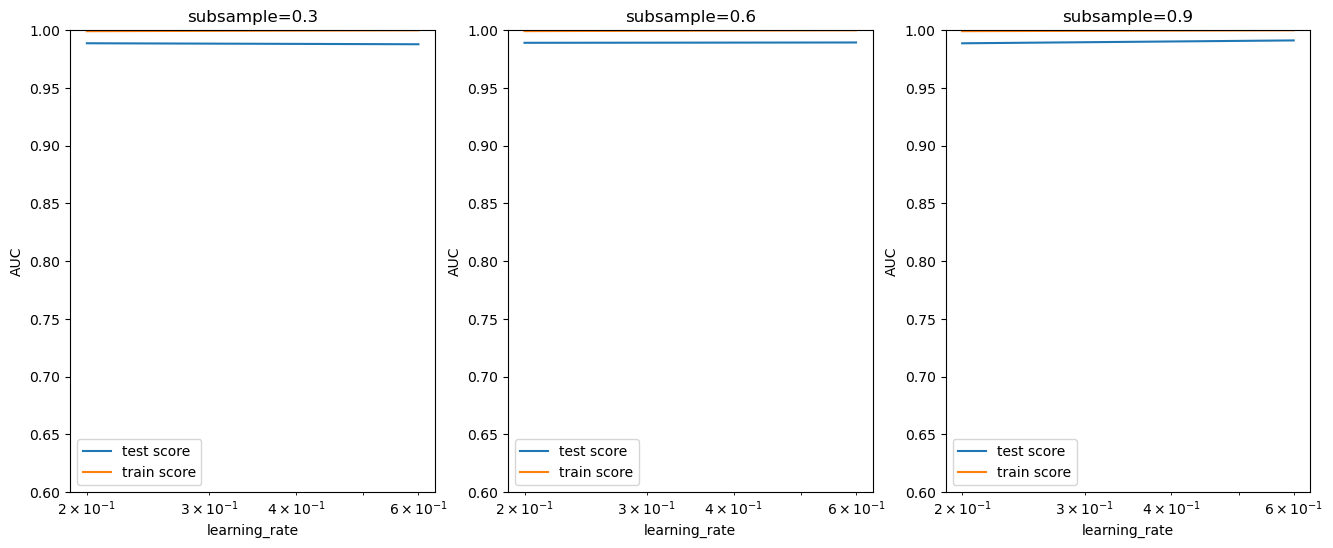

In [335]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='lower left')
    plt.xscale('log')

In [336]:
adasyn_hyper_parameter.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [337]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

## Train set Prediction


In [338]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [339]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[227449      0]
 [     0 227448]]


In [340]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [341]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999956034003302
Sensitivity:- 1.0
Specificity:- 1.0


In [342]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227448

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897



In [343]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

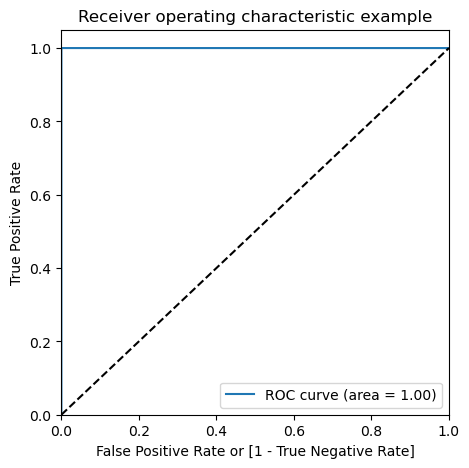

In [344]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##  Test set Prediction


In [345]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [346]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56824    42]
 [   22    74]]


In [347]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [348]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9988764439450862
Sensitivity:- 0.7708333333333334
Specificity:- 0.9992614215875919


In [349]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.64      0.77      0.70        96

    accuracy                           1.00     56962
   macro avg       0.82      0.89      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [350]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [351]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9531543086671591

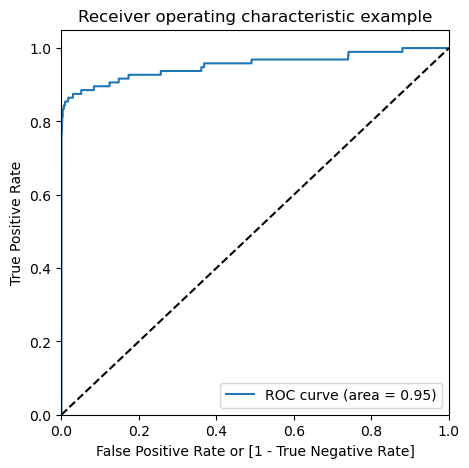

In [352]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Model summary XGBoost-4

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.78
    - Specificity = 0.99
    - ROC-AUC = 0.95

## Evaluating and Selecting the Best Model for Balanced Data
We balanced the data using various techniques, including Undersampling, Oversampling, SMOTE, and ADASYN, and built several models such as Logistic Regression, XGBoost, Decision Tree, and Random Forest.

All models showed good performance to varying extents. However, since Undersampling resulted in some loss of information, it is preferable to exclude these models from consideration.

The models trained with **SMOTE and ADASYN** performed well, but among them, the **Logistic Regression model stood out. It achieved an impressive ROC score of 0.99 on the training set and 0.97 on the test set. This high ROC score indicates that Logistic Regression, enhanced with SMOTE, effectively distinguishes between classes.** 

Given its simplicity, ease of interpretation, and lower resource requirements compared to more complex models like Random Forest and XGBoost, the Logistic Regression model with SMOTE is deemed the best choice. Its efficiency and performance make it suitable for practical applications where both accuracy and resource constraints are critical.

##  Calculate FPR(False Positive Rate) and TPR(True Positive Rate), and Choose the Best Threshold from the ROC Curve for the Top Model

In [354]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9897539729615745
Threshold= 0.5311563627476669


In [355]:
import pickle

# Save the best model to a pickle file
with open('load_best_model.pkl', 'wb') as f:
  pickle.dump(logistic_bal_smote_model, f)

In [356]:
import pickle

In [358]:
print(pickle.format_version)

4.0


The optimal threshold is 0.53, where the True Positive Rate (TPR) is highest and the False Positive Rate (FPR) is lowest, yielding the best ROC score.


#  Comprehensive Cost-Benefit Analysis
 **While most models performed well in terms of ROC score, Precision, and Recall, selecting the best model requires careful consideration of several factors, including infrastructure, resources, and computational power. Complex models like Random Forest, SVM, and XGBoost demand significant computational resources, leading to increased deployment costs. These models also come with disadvantages such as difficulty in interpretation and tuning, which adds to the complexity of model management and maintenance.**

**In contrast, simpler models like Logistic Regression are more cost-effective to build and deploy due to their lower computational requirements. Logistic Regression offers easier interpretation and implementation, which is crucial for understanding model decisions and ensuring regulatory compliance.**

**When evaluating the trade-offs between model complexity and performance, the financial implications of minor changes in the ROC score must be considered. If the monetary impact of a slight improvement in the ROC score is substantial, investing in a complex model might be justified despite higher costs. However, if the gains are marginal, a simpler, more cost-effective model like Logistic Regression is preferable due to its lower resource requirements and ease of use.**

##  Business Summary


**For banks with smaller average transaction values, high precision is essential because we want to label only relevant transactions as fraudulent. Each flagged transaction can be verified by calling the customer, adding a human element to the verification process. However, when precision is low, this task becomes burdensome due to the increased need for human intervention.**

**Conversely, for banks handling larger transaction values, low recall is a significant concern as it means the model fails to detect some fraudulent transactions. Missing high-value fraudulent transactions can lead to substantial financial losses.**

**To safeguard against high-value fraudulent transactions, focusing on high recall is crucial for detecting actual fraudulent activities.**

**After evaluating several models, we observed that with a balanced dataset using the SMOTE technique, the Logistic Regression model performed exceptionally well, achieving a good ROC score and high recall. This model is not only effective but also easy to interpret and explain to business stakeholders.**

**Therefore, we recommend the Logistic Regression model with SMOTE for its excellent balance of performance and simplicity, ensuring accurate detection of high-value fraudulent transactions while keeping operational costs low.**

In [359]:
# Load the pickled model
with open('load_best_model.pkl', 'rb') as f:
  model = pickle.load(f)

# Make predictions on new data
new_data = X_test
predictions = model.predict(new_data)

In [360]:
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)

[[55416  1450]
 [   10    86]]


In [361]:
accuracy_score = metrics.accuracy_score(y_test, predictions)
print("Accuracy:", accuracy_score)

Accuracy: 0.9743688774972789


In [362]:
precision= metrics.precision_score(y_test, predictions)
print("Precision:", precision)

Precision: 0.055989583333333336


In [363]:
recall= metrics.recall_score(y_test, predictions)
print("Recall:", recall)

Recall: 0.8958333333333334


In [364]:
f1_score= metrics.f1_score(y_test, predictions)
print("F1-score:", f1_score)

F1-score: 0.1053921568627451
